NOTES

OSEMN process
* Obtain
* Scrub
* Explore
* Model
* iNterpret

# Machine Learning Classification with a cervical cancer dataset 



Student: Giovanni Rosati (part-time pacing)
    
Pacing: part-time

Scheduled project review date/time: TBD

Instructor: Jeff Herman

Blog URL: TBD

GitHub Repository: https://github.com/giorosati/dsc-3-final-project-online-ds-pt-100118

Citation requested by dataset publisher:

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.

Dataset link: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

## Project Overview

The objective of this project is to develop a machine learning model(s) that can accurately predict the presence of cervical cancer (as determined by a bioppsy) from as many as 35 possible risk factors recorded for each woman in the datset. A challenge when developing prediction models for this type of data is the balance between precision and recall:
* Precision will represent the proportion of the models' predictions of cancer where cancer is actually present.
* Recall will represent the proportion of the actual cases of cancer that the model accurately predicted. 

Because not "capturing" even one case of cancer could result in death, the models should place appropriate emphasis on the recall score - it is preferrable to not miss anyone that has a signifigant probability of cancer even if that means "flagging" some patients as likely to have cancer that are actually cancer free.  

Another challenge with this type of data is that positive cases (cancer present) are typically (thankfully!) a small proportion of the total patients. This unbalanced nature of the data can make prediction more difficult for machine learning models, especially KNN (K nearest neighbors), simply because there are fewer cases to learn from. For example, imagine a dataset with 1,000 records where 20 are actually positive for the presence of a particular cancer (very possible):
* A model that predicts that everyone has cancer would have a precision score of 4% but a recall score of 100%. All these patients would likely be subjected to a biopsy, capturing all the cancer cases but subjecting 960 women to an unneccesary proceedure.

The goal is to be able to find as many of the cancer cases with as few as possible "false positives".


The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values). The dataset comes from a paper first published online on 12 May 2017. I am uncertain during what time period the data was collected.

Here's an overview of the dataset showing the percentage of missing values for each factor:


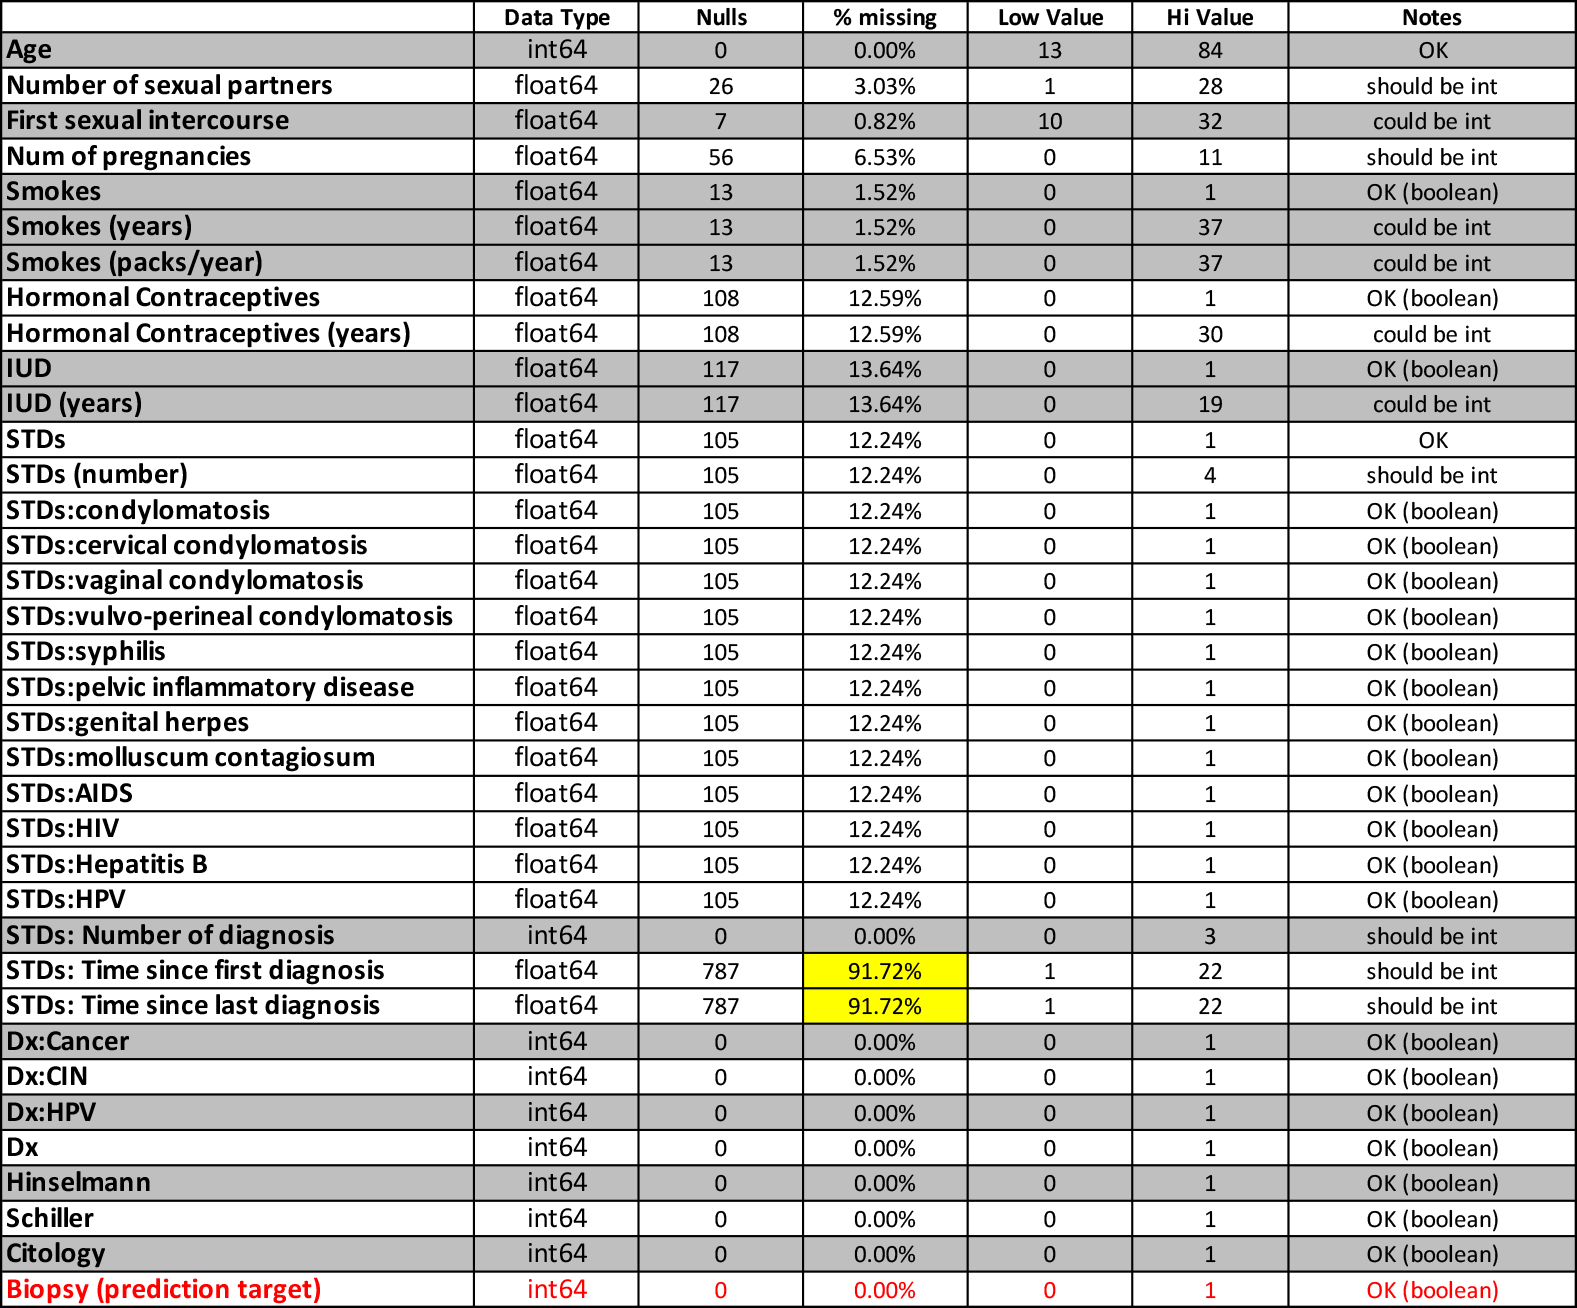

My approach will follow the OSEMN protocol:
* Obtain
* Scrub
* Explore
* Model
* iNterpret

## Obtain
The dataset will be obtained from the University of California at Irvine (UCI) Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

## Scrub
After an initial inspection of the dataset to identify missing values and any other obvious issues I will develop and implement processes to minimize the negative impacts of the issues identified.

## Explore
Further exploratory data analysys (EDA) will be perfomed to better understand the data including the range and distribution of the values within each factor and any possible correlations between factors and to the prediction target.

## Model
Multiple machine learning models will be tested. Additionally, some tuning of the available parameters for each model will be explored in the quest for the best performing model. 




After downloading the data I will develop a strategy for missing values and other readily apparent issues.



In [1]:
# needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

from scipy import stats

# np.random.seed(0) # for reproducibility
%matplotlib inline

In [2]:
# !pip list

In [3]:
# added this cell to look at the data before converting ? values to NaN using na_values="?"
# df_test = pd.read_csv('risk_factors_cervical_cancer.csv')

# for column in df_test.columns:
#     print('Unique values and count in {}'.format(column))
#     print(pd.value_counts(df_test[column].values))

In [4]:
# load the dataset as a Pandas dataframe
df_import = pd.read_csv('risk_factors_cervical_cancer.csv', na_values="?")

In [5]:
df_import.shape

(858, 36)

In [6]:
df_import.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [7]:
# df_test = df_import[['Dx:Cancer', 'Biopsy']].copy(deep=True)


In [8]:
# df_test['Dx:Cancer'].value_counts(dropna=False)

In [9]:
# df_test['Biopsy'].value_counts(dropna=False)

In [10]:
for column in df_import.columns:
    print('Unique values and count in {}'.format(column))
    print(df_import[column].value_counts(dropna=False))

Unique values and count in Age
23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
30    35
17    35
29    33
27    33
22    30
35    29
33    28
31    27
36    24
34    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
45     6
44     6
42     6
43     5
14     5
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
Name: Age, dtype: int64
Unique values and count in Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
NaN      26
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
Name: Number of sexual partners, dtype: int64
Unique values and count in First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
22.0      9
23.0      9
NaN       7
26.0      7
12.0      6
24.0      6
27.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10

In [11]:
for column in df_import.columns:
    print(column)

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
STDs: Time since first diagnosis
STDs: Time since last diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy


In [12]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [13]:
df_import.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [14]:
# for column in df_import.columns:
#     print('Unique values in {}'.format(column))
#     values_list = df_import[column].unique()
#     values_list.sort()
#     print (values_list)
        

In [15]:
# copy the import to a new dataframe
df = df_import.copy(deep=True)

# NEED TO REDO THIS

Many of the factors have missing values,

I plan to create new factors so that the information contained between those records with a value and without is not lost. 

Smokes, Hormonal Contraceptives, IUD, and STDs are all boolean factors with missing values. I will change these factors to categorical factors with three values: True, False, Unknown.

For factors that are ordinal (Number of sexual partners, First sexual intercourse, Num of pregnancies) I will create an new boolean factor to identify which records had a value from those that did not, and then replace the missing values with the mean from that factor.



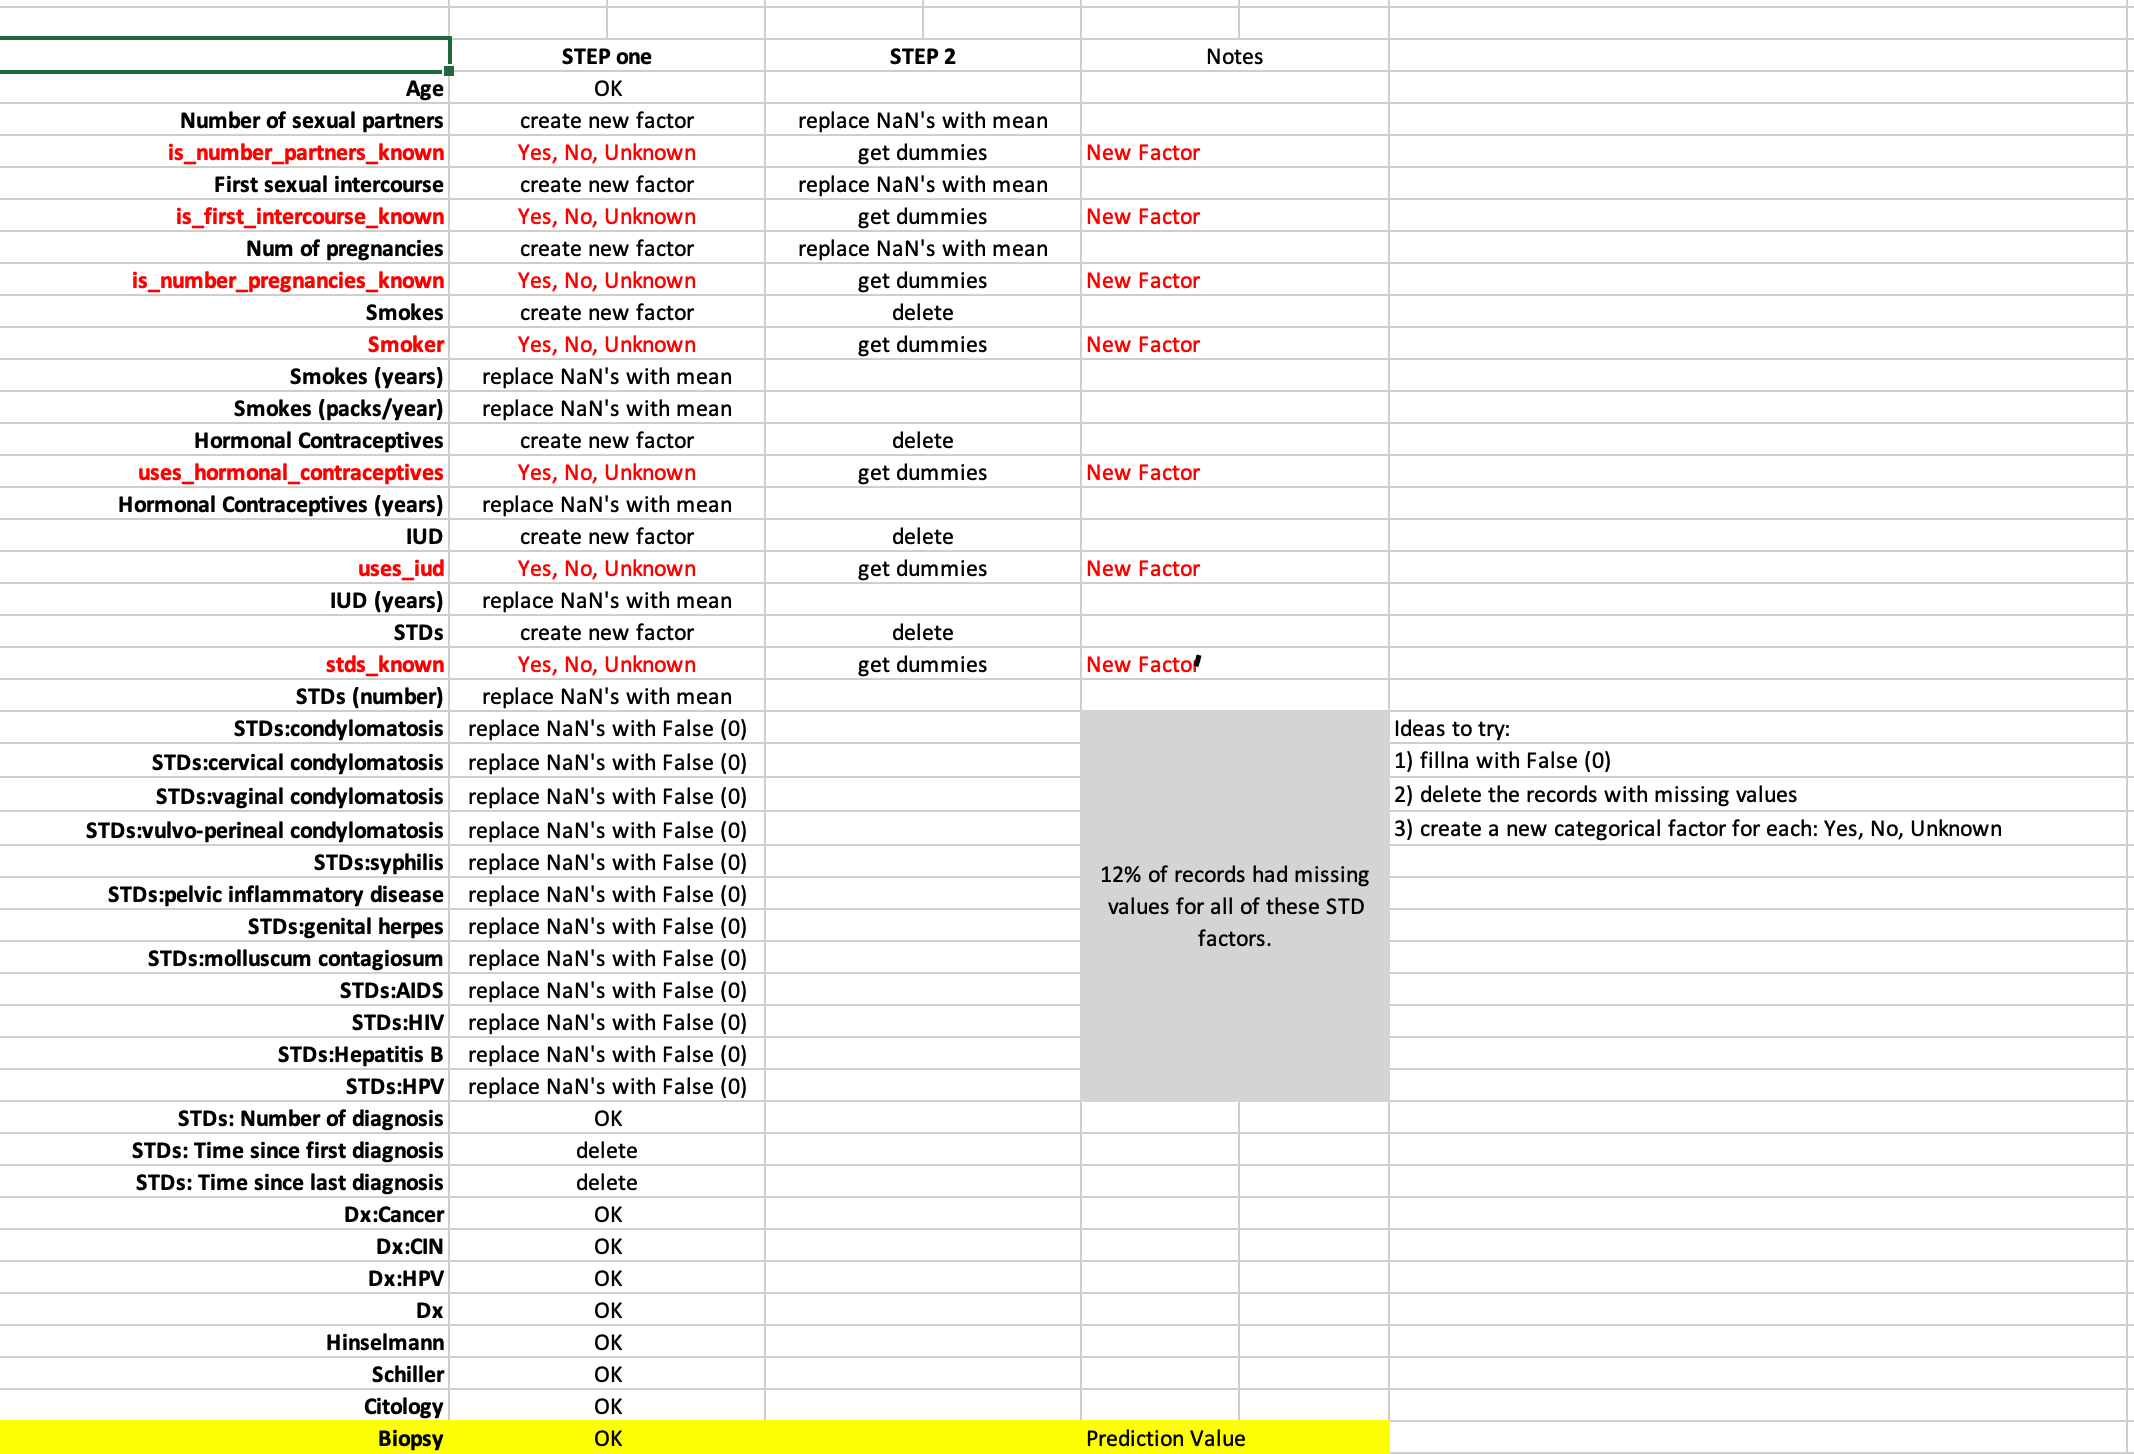

In [16]:
# function to create a new boolean column in a df,
# given a column with int, float, and/or numpy.nan values.

def new_bool(df, col_name):
    bool_list = []
    for index, row in df.iterrows():
#         print(row)
        value = row[col_name]
#         print(value)
        value_out = 1  # originally used value_out = np.True
        if pd.isna(value):
            value_out = 0  # originally used value_out = np.False
            
#       for testing
#         print("value: {}   -   bool: {}".format(value, str(value_out)))

        bool_list.append(value_out)

    return bool_list

#       for testing
#         print("value: {}   -   bool: {}".format(value, str(row[new_col_name])))


In [17]:
# create new factor 'is_number_partners_known'
df['is_number_partners_known'] = new_bool(df, 'Number of sexual partners')

In [18]:
# check if operation was successful
df['is_number_partners_known'].value_counts(dropna=False)

1    832
0     26
Name: is_number_partners_known, dtype: int64

In [19]:
# create new factor 'is_first_intercourse_known'
df['is_first_intercourse_known'] = new_bool(df, 'First sexual intercourse')

In [20]:
# check if operation was successful
df['is_first_intercourse_known'].value_counts(dropna=False)

1    851
0      7
Name: is_first_intercourse_known, dtype: int64

In [21]:
# create new factor 'is_number_pregnancies_known'
df['is_number_pregnancies_known'] = new_bool(df, 'Num of pregnancies')

In [22]:
# check if operation was successful
df['is_number_pregnancies_known'].value_counts(dropna=False)

1    802
0     56
Name: is_number_pregnancies_known, dtype: int64

In [23]:
# function to replace boolean factors that have missing values with a categorical factor with three values:
# Yes, No, Unknown

def new_categorical(df, col_name):
    values_list = []
    for index, row in df.iterrows():
        value = row[col_name]
        
#         print('original value: {}'.format(value))
        if pd.isna(value):
            value = "Unknown"
        elif value == 1:
            value = "Yes"
        else:
            value = "No"
        
#         print('new value: {}'.format(value))
        values_list.append(value)
    
    return values_list


In [24]:
# replaced these with get_dummies(dummy_na=True)

# # create new factor 'is_number_pregnancies_known'
# df['smoker'] = new_categorical(df, 'Smokes')

# # check if operation was successful
# df['smoker'].value_counts()

In [25]:
# # create new factor 'uses_hormonal_contraceptives'
# df['uses_hormonal_contraceptives'] = new_categorical(df, 'Hormonal Contraceptives')

# # check if operation was successful
# df['uses_hormonal_contraceptives'].value_counts()


In [26]:
# # create new factor 'uses_iud'
# df['uses_iud'] = new_categorical(df, 'IUD')

# # check if operation was successful
# df['uses_iud'].value_counts()


In [27]:
# # create new factor 'stds_known'
# df['stds_known'] = new_categorical(df, 'STDs')

# # check if operation was successful
# df['stds_known'].value_counts()



* replace NaN's with mean:
    * Number of sexual partners
    * First sexual intercourse
    * Num of pregnancies
    * Smokes (years)
    * Smokes (packs/year)
    * Hormonal Contraceptives (years)
    * IUD (years)
    * STDs (number)
      
* replace NaN's with zero:  -  change this to make new categorical factors
    * STDs:condylomatosis
    * STDs:cervical condylomatosis
    * STDs:vaginal condylomatosis
    * STDs:vulvo-perineal condylomatosis
    * STDs:syphilis
    * STDs:pelvic inflammatory disease
    * STDs:genital herpes
    * STDs:molluscum contagiosum
    * STDs:AIDS
    * STDs:HIV
    * STDs:Hepatitis B
    * STDs:HPV
    
* Drop columns:
    * Smokes
    * Hormonal Contraceptives
    * IUD
    * STDs
    * STDs: Time since first diagnosis
    * STDs: Time since last diagnosis
    
* get dummies for categorical factors:
    * is_number_partners_known
    * is_first_intercourse_known
    * is_number_pregnancies_known
    * smoker
    * uses_hormonal_contraceptives
    * uses_iud
    * stds_known
    

In [28]:
df2 = df.copy(deep=True)


In [29]:
# drop the columns that have missing values over 90%
df2 = df.drop(['STDs: Number of diagnosis',
             'STDs: Time since first diagnosis',
             'STDs: Time since last diagnosis'], axis=1)

In [30]:
# replace continious factors missing values with the mean (or median) for each factor 
col_list = ['Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Hormonal Contraceptives (years)',
    'IUD (years)']


# to add the mean
# for col in col_list:
#     df2[col].fillna(df2[column].mean(), inplace=True)
    
# to add the median
for col in col_list:
    df2[col].fillna(df2[col].median(), inplace=True)
    

In [31]:
# replace missing values in these factors with a zero
col_list = ['Smokes',
    'Smokes (years)',
    'Smokes (packs/year)',
    'STDs (number)',
    'STDs:condylomatosis',
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV']


for col in col_list:
    df2[col].fillna(0, inplace=True)


In [32]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,is_number_partners_known,is_first_intercourse_known,is_number_pregnancies_known
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,750.000000,858.000000,741.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,0.641333,2.035331,0.112011,...,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103,0.969697,0.991841,0.934732
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,0.479929,3.567040,0.315593,...,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078,0.171520,0.090008,0.247142
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df2.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                             0
STDs                                  105
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [34]:
# Revised this - because there were values with zero and values with no data, decided to use get_dummies
# with the kwarg that creates a column for records that have no value
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html


# drop two factors that have no information
# df2.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)

In [35]:
# same revision as cell above

# replace missing values in boolean factors with 0 (False)


    
# for col in col_list:
#     df2[col].fillna(0, inplace=True)

In [36]:
# replaced with the cell below

# col_list = ['is_number_partners_known',
#             'is_first_intercourse_known',
#             'is_number_pregnancies_known',
#             'smoker',
#             'uses_hormonal_contraceptives',
#             'uses_iud',
#             'stds_known',
#             'Dx:Cancer',
#             'Dx:CIN',
#             'Dx:HPV',
#             'Dx',
#             'Hinselmann',
#             'Schiller',
#             'Citology']

# for col in col_list:
#     df2[col] = 

In [37]:
# original version
# df2 = pd.get_dummies(
#     data=df2, 
#     dummy_na=True, 
#     columns=['is_number_partners_known',
#              'is_first_intercourse_known',
#              'is_number_pregnancies_known',
#              'Smokes',
#              'Hormonal Contraceptives',
#              'IUD',
#              'STDs',
#              'Dx:Cancer',
#              'Dx:CIN',
#              'Dx:HPV',
#              'Dx',
#              'Hinselmann',
#              'Schiller',
#              'Citology',
#              'STDs:condylomatosis',
#              'STDs:cervical condylomatosis',
#              'STDs:vaginal condylomatosis',
#              'STDs:vulvo-perineal condylomatosis',
#              'STDs:syphilis',
#              'STDs:pelvic inflammatory disease',
#              'STDs:genital herpes',
#              'STDs:molluscum contagiosum',
#              'STDs:AIDS',
#              'STDs:HIV',
#              'STDs:Hepatitis B', 
#              'STDs:HPV',
#              'Dx:Cancer',
#              'Dx:CIN',
#              'Dx:HPV',
#              'Dx',
#              'Hinselmann',
#              'Schiller',
#              'Citology'])

In [38]:
df2 = pd.get_dummies(
    data=df2, 
    dummy_na=True, 
    columns=['Hormonal Contraceptives',
             'IUD',
             'STDs',])

In [39]:
df2.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0


# this is now inaccurate

This created columns that have no information - for categorical factors (bools too) that did not 
have any NaN, a NaN factor was created anyway:

* is_number_partners_known_nan
* is_first_intercourse_known_nan
* is_number_pregnancies_known_nan
* Dx_Cancer_nan
* Dx_CIN_nan
* Dx_HPV_nan
* Dx_nan
* Hinselmann_nan
* Schiller_nan
* Citology_nan

These columns could be deleted.

In [40]:
# col_list = ['is_number_partners_known_nan',
#             'is_first_intercourse_known_nan',
#             'is_number_pregnancies_known_nan',
#             'Dx:Cancer_nan',
#             'Dx:CIN_nan',
#             'Dx:HPV_nan',
#             'Dx_nan',
#             'Hinselmann_nan',
#             'Schiller_nan',
#             'Citology_nan']

# for col in col_list:
#     df2.drop([col], axis=1, inplace=True)

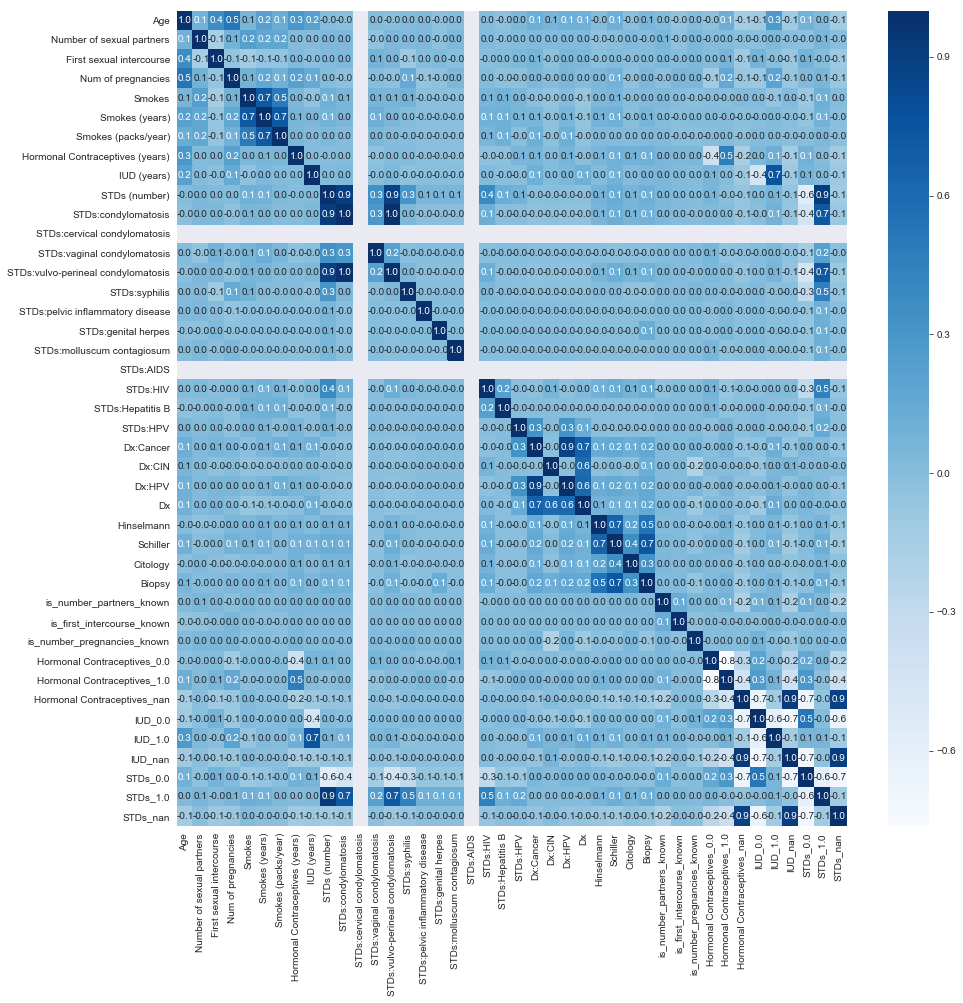

In [41]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

Two factors appear to have no information, ie. all values are the same for the factor.

In [42]:
# drop useless factors
df2.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)

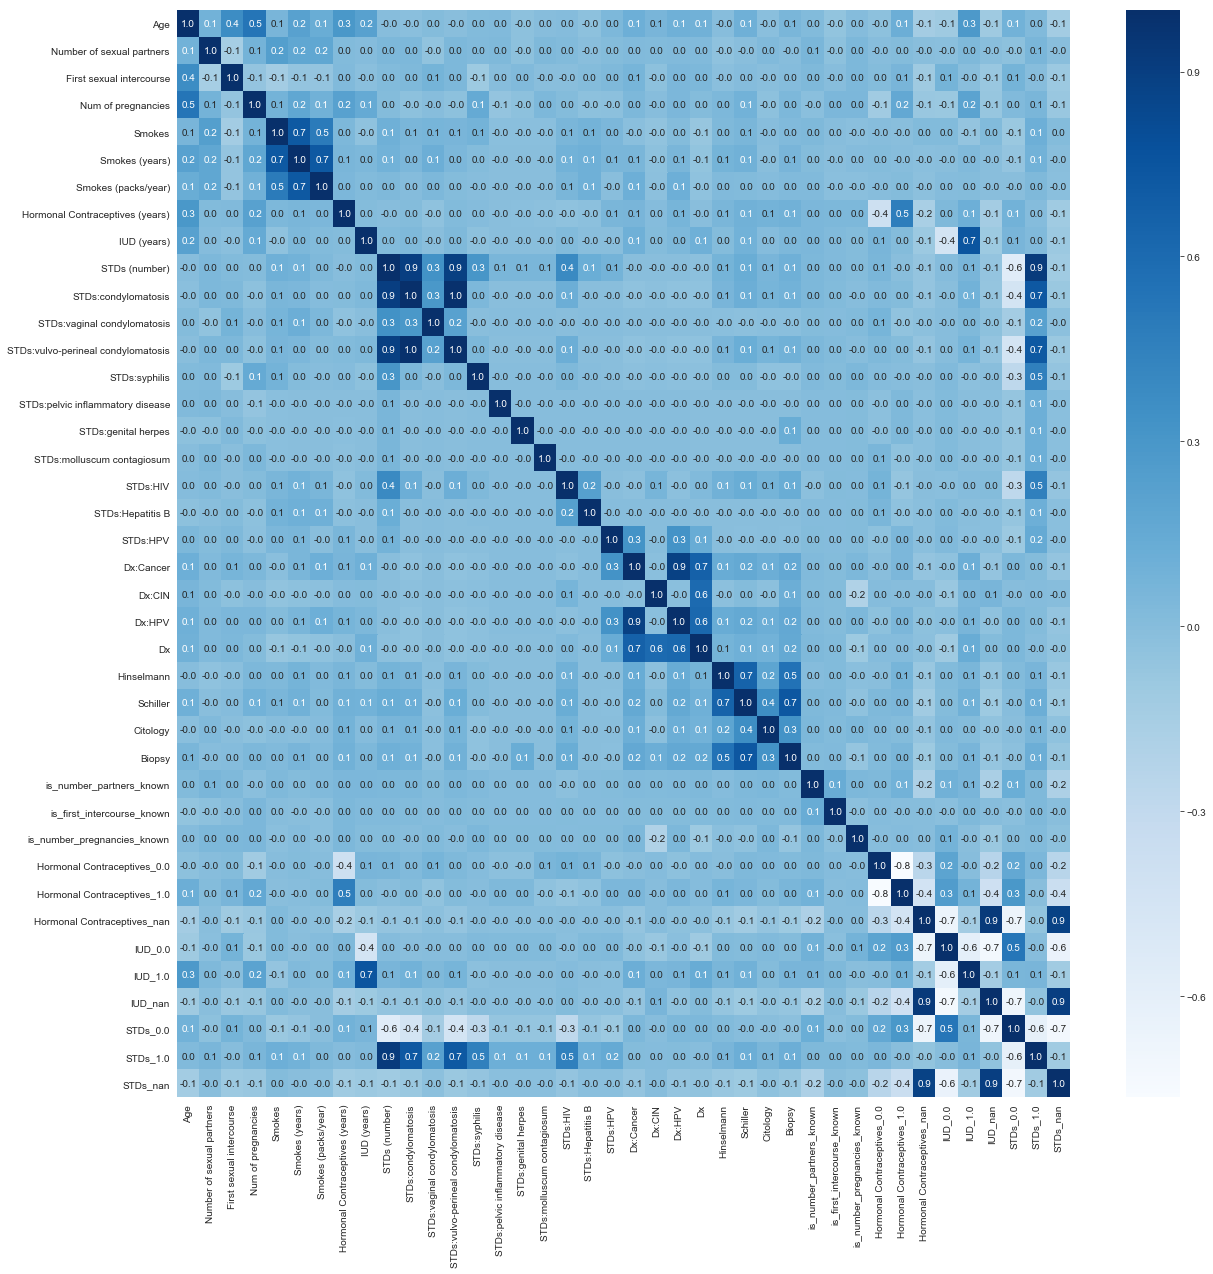

In [43]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

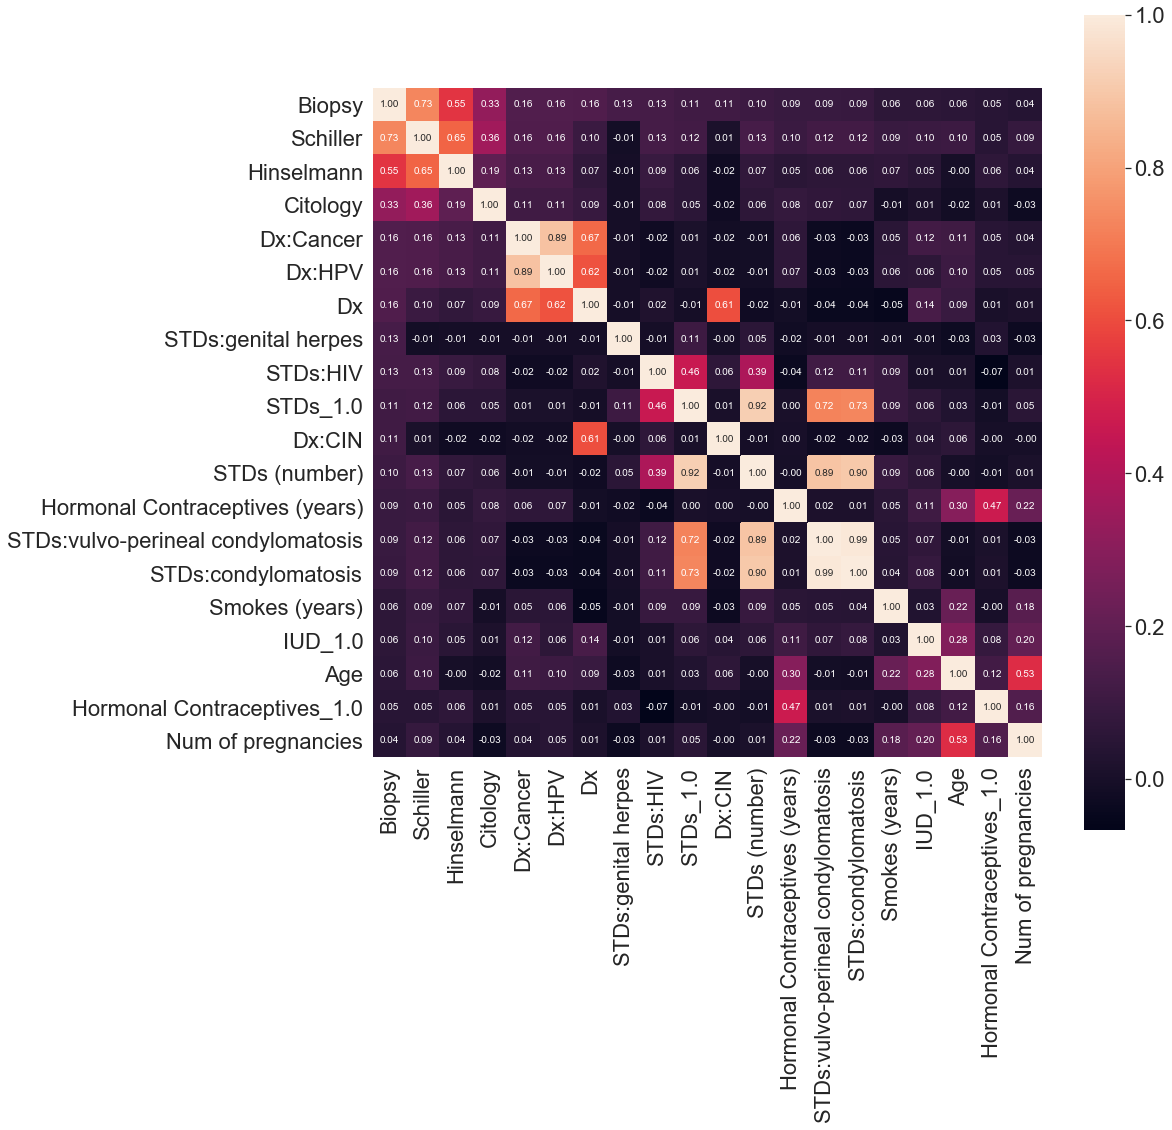

In [44]:
# look at a correlation matrix of the top 20 factors to the target variable: Biopsy

corrmat = df2.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df2[cols].values.T)

plt.figure(figsize=(15,15))

sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [45]:
# make a copy of df2
df_backup = df2.copy()

In [46]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,2.035331,0.444604,0.155012,...,0.934732,0.313520,0.560606,0.125874,0.766900,0.096737,0.136364,0.785548,0.092075,0.122378
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,3.567040,1.814218,0.529617,...,0.247142,0.464194,0.496603,0.331901,0.423052,0.295771,0.343374,0.410681,0.289300,0.327913
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,30.000000,19.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It appears that only these factors have a signifigant correlation to Biopsy:
* Schiller
* Hinselman
* Citology

In [47]:
# look at the distribution of the continuous factors
continuous_cols = ['Age',
            'Number of sexual partners',
            'First sexual intercourse',
            'Num of pregnancies',
            'Smokes (years)',
            'Smokes (packs/year)',
            'Hormonal Contraceptives (years)',
            'IUD (years)',
            'STDs (number)']


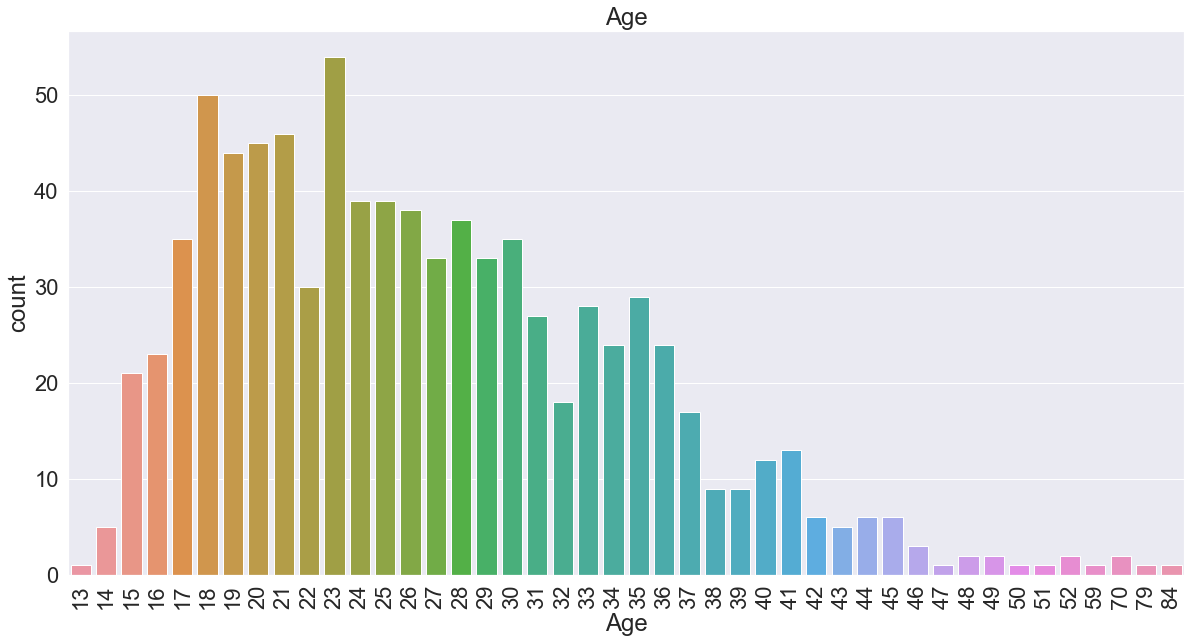



count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64
************************************************


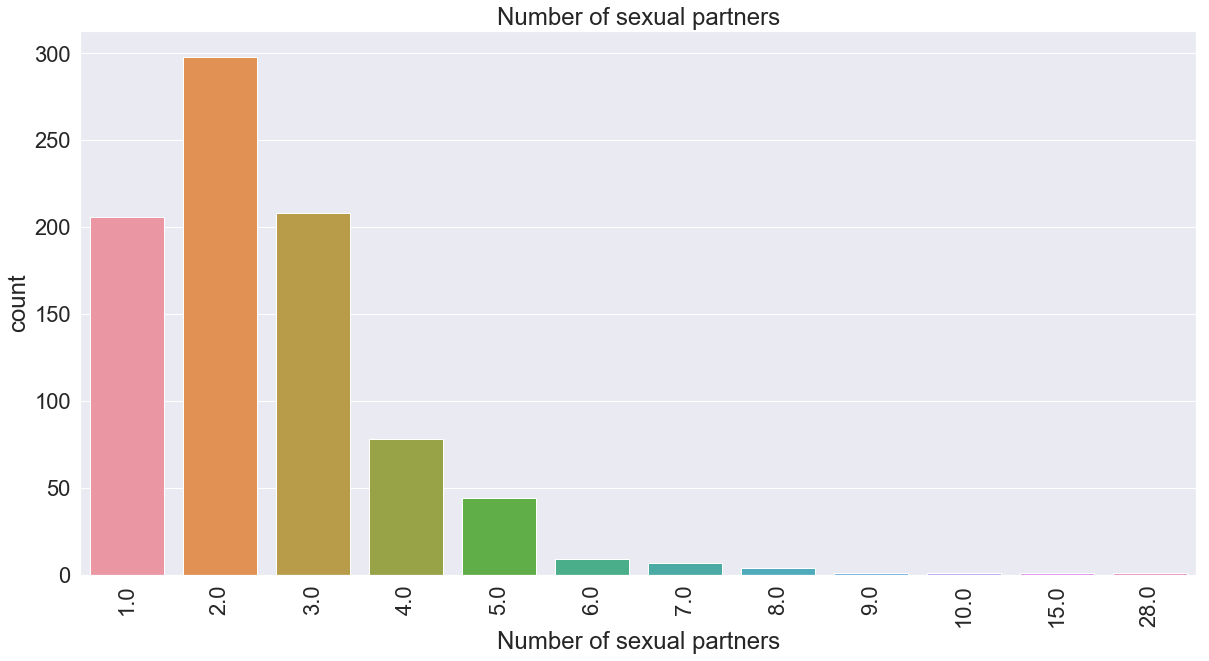



count    858.000000
mean       2.511655
std        1.644759
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64
************************************************


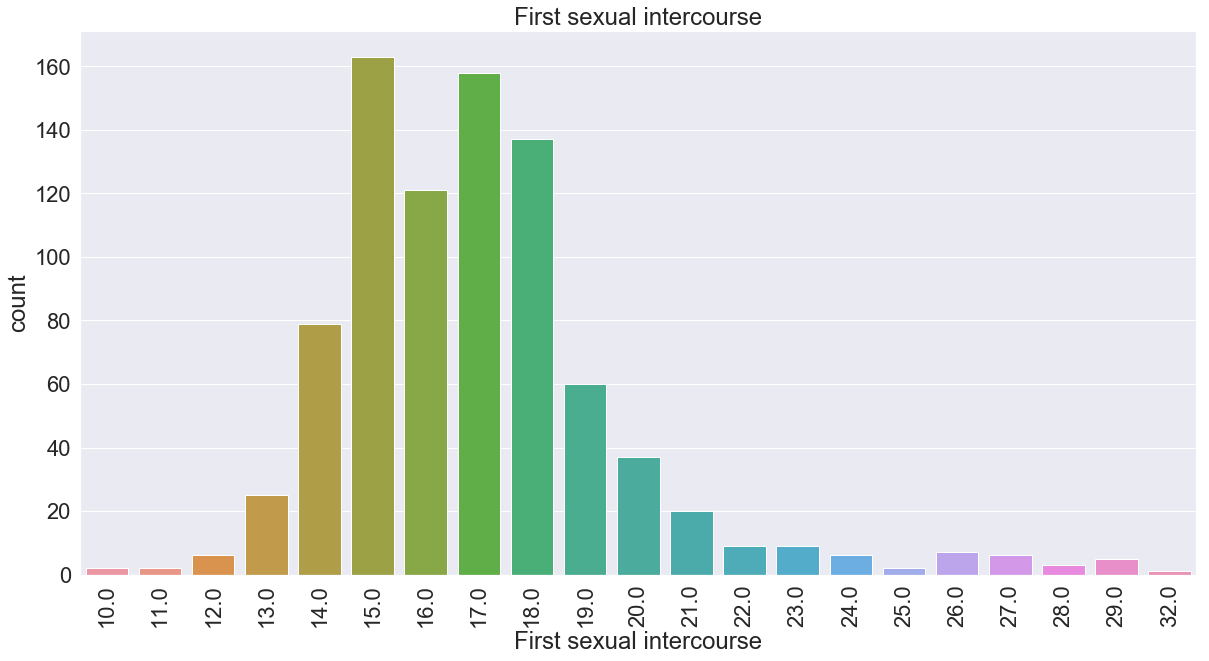



count    858.000000
mean      16.995338
std        2.791883
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64
************************************************


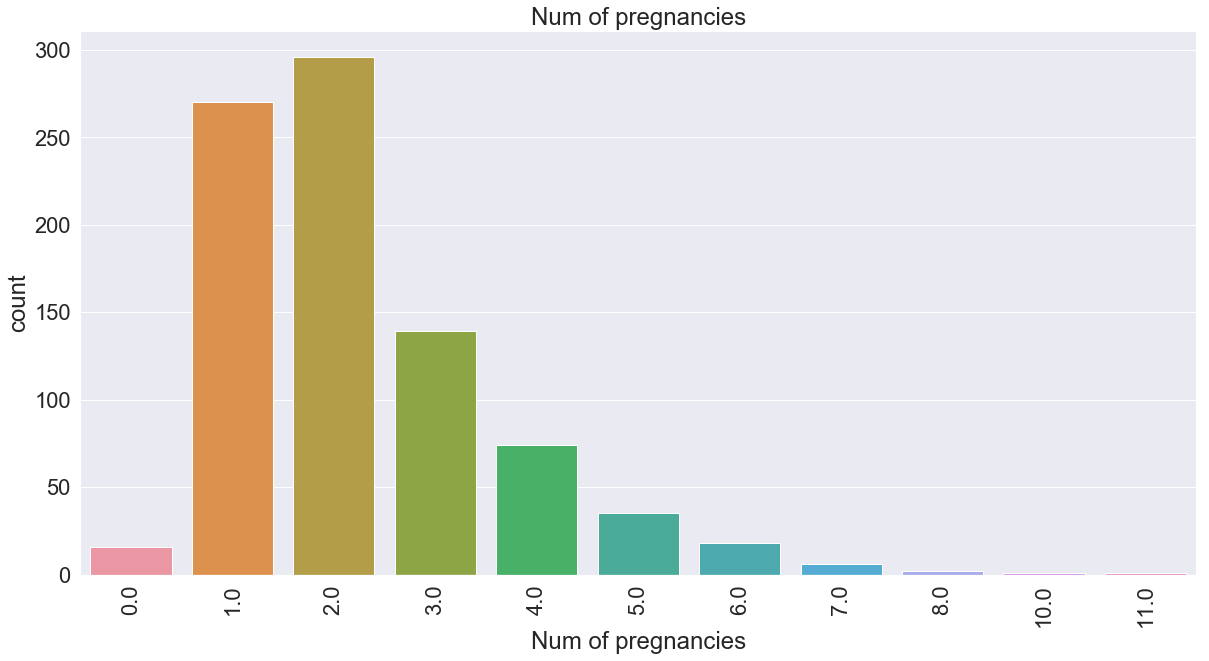



count    858.000000
mean       2.257576
std        1.400981
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Num of pregnancies, dtype: float64
************************************************


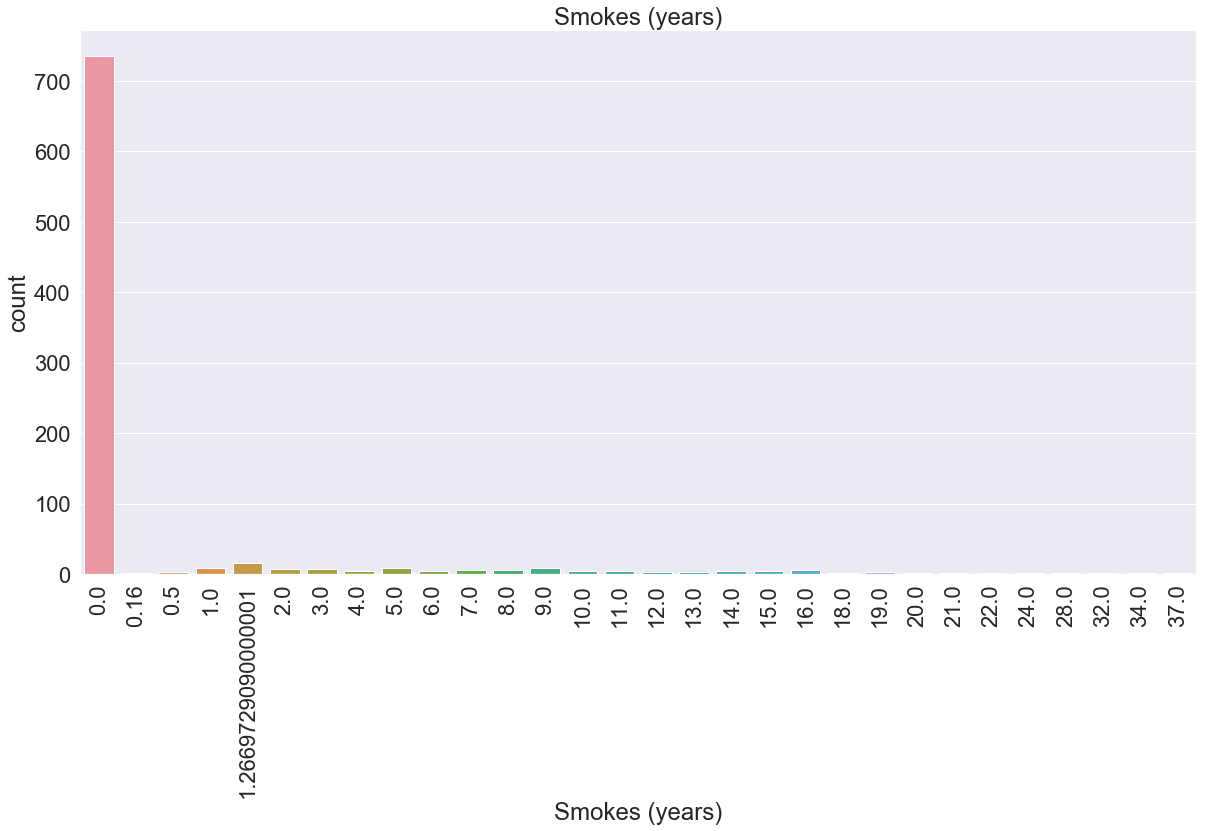



count    858.000000
mean       1.201241
std        4.060623
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (years), dtype: float64
************************************************


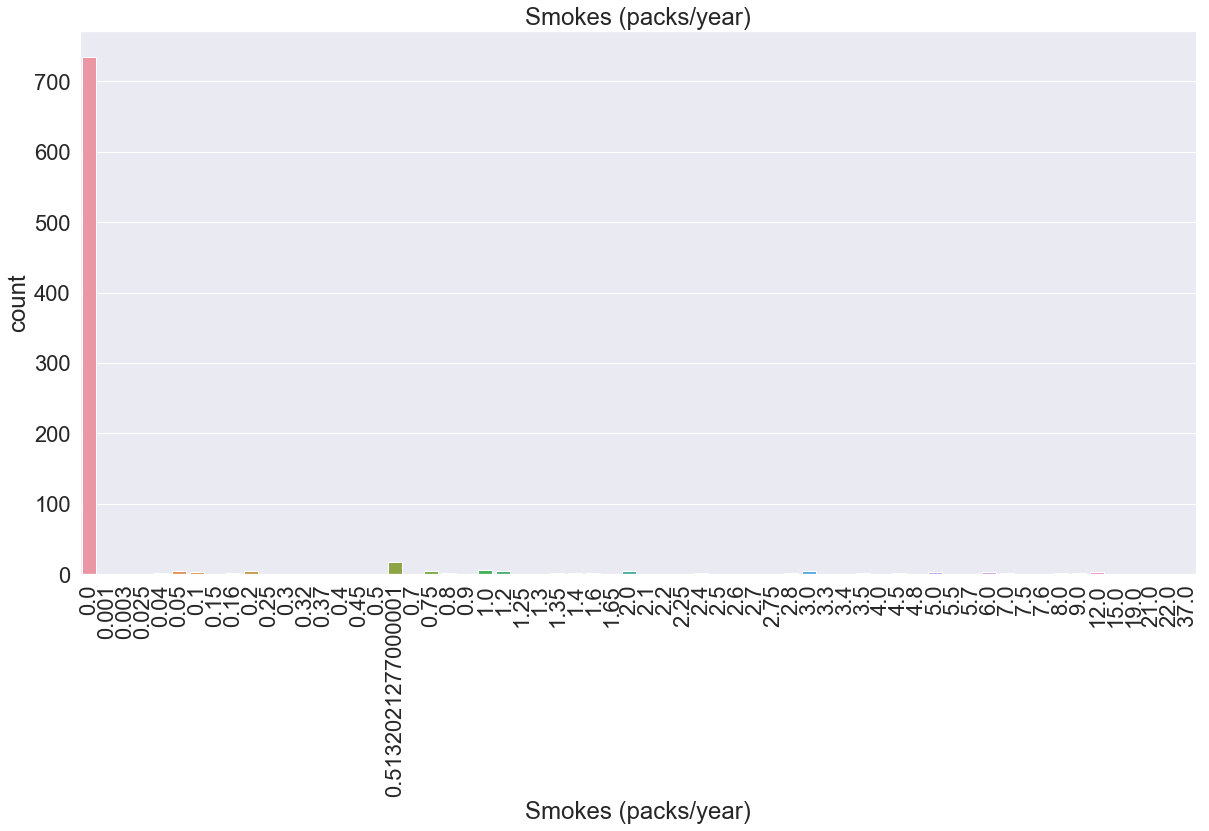



count    858.000000
mean       0.446278
std        2.210351
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (packs/year), dtype: float64
************************************************


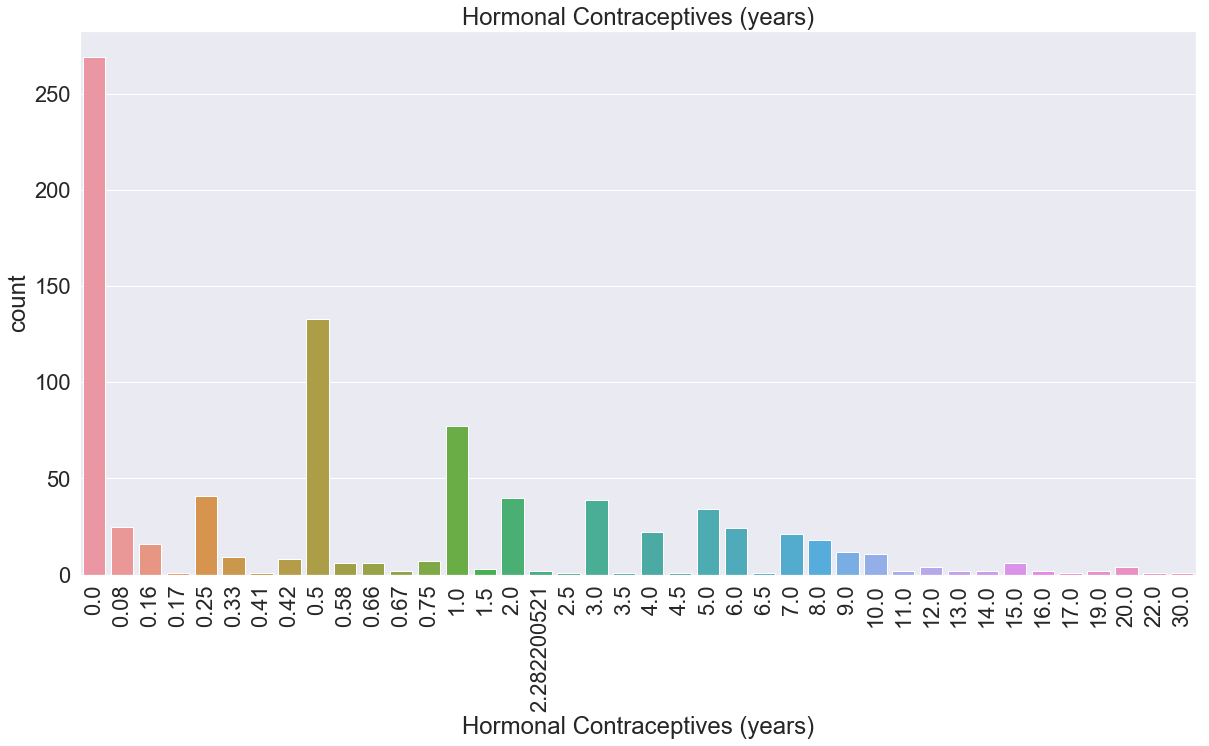



count    858.000000
mean       2.035331
std        3.567040
min        0.000000
25%        0.000000
50%        0.500000
75%        2.000000
max       30.000000
Name: Hormonal Contraceptives (years), dtype: float64
************************************************


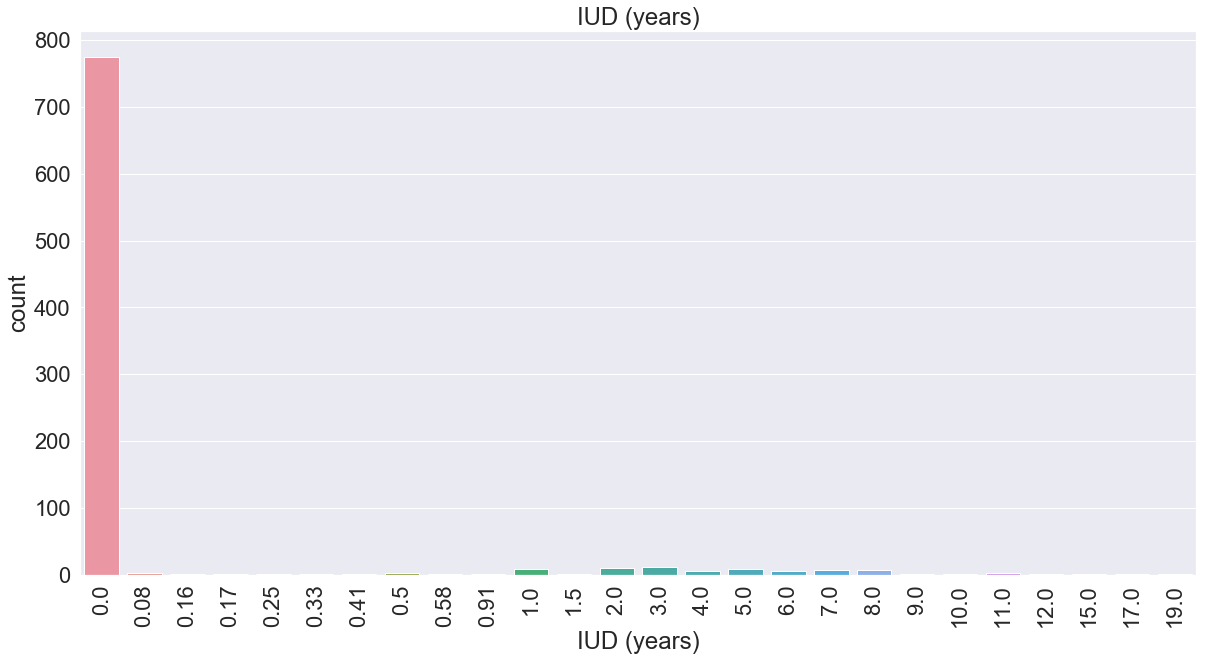



count    858.000000
mean       0.444604
std        1.814218
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: IUD (years), dtype: float64
************************************************


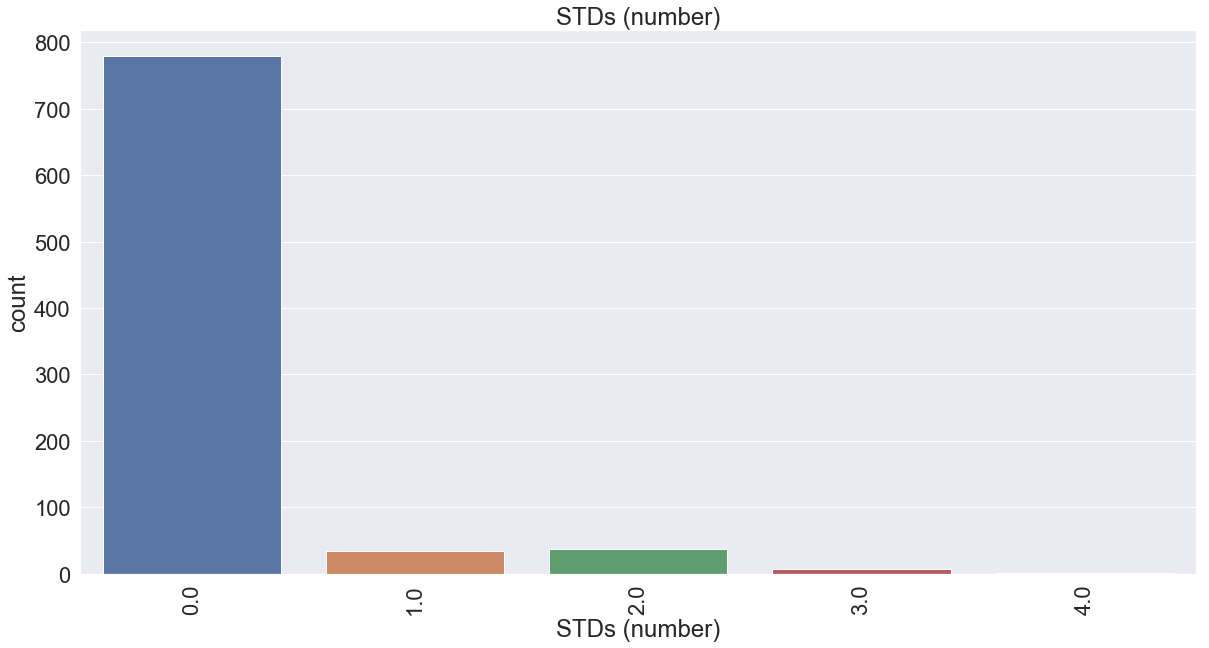



count    858.000000
mean       0.155012
std        0.529617
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: STDs (number), dtype: float64
************************************************


In [48]:
for col in continuous_cols:
    fig = plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=df2)
    plt.title(col)
#     plt.xlabel(col[0],  )
    plt.xticks(rotation=90)
    plt.show()
    print("\n")
    print(df2[col].describe())
    print('************************************************')

In [49]:
# create X and y
# X = df2.drop('Biopsy' axis=1)  #original version
# X = df2.drop(['Biopsy', 'Hinselmann', 'Schiller', 'Citology'], axis=1)  #temporarily disabled, keeping all but Biopsy
X = df2.drop(['Biopsy'], axis=1)

y = df2['Biopsy']


In [50]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,3.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,15.0,0.0,0.0,...,1,0,1,0,1,0,0,1,0,0


In [51]:
X.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
       'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology', 'is_number_partners_known',
       'is_first_intercourse_known', 'is_number_pregnancies_known',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0',
       'Hormonal Contraceptives_nan', 'IUD_0.0', 'IUD_1.0', 'IUD_nan',
       'STDs_0.0', 'STDs_1.0', 'STDs_nan'],
      dtype='object')

In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Biopsy, dtype: int64

In [53]:
# create 80/20 train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)


In [54]:
type(X_train)

pandas.core.frame.DataFrame

In [55]:
# Look at the numeric features and choose normalization or standardization
# none of these features have a "normal" distribution. Only Age is moderately "normal".

In [56]:
# standardize the continuous factors

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

X_train = pd.DataFrame(minmax_scale.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(minmax_scale.fit_transform(X_test), columns = X.columns)


In [57]:
type(X_train)

pandas.core.frame.DataFrame

In [58]:
print(X_train.shape)
print(y_train.shape)

(686, 39)
(686,)


In [59]:
print(X_test.shape)
print(y_test.shape)

(172, 39)
(172,)


In [60]:
y_train.value_counts()

0    647
1     39
Name: Biopsy, dtype: int64

In [61]:
y_test.value_counts()

0    156
1     16
Name: Biopsy, dtype: int64

In [62]:
X_train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
0,0.183099,0.074074,0.409091,0.181818,0.0,0.0,0.0,0.166667,0.0,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.267606,0.000000,0.545455,0.181818,0.0,0.0,0.0,0.233333,0.0,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.056338,0.037037,0.227273,0.181818,0.0,0.0,0.0,0.000000,0.0,0.75,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.098592,0.074074,0.272727,0.363636,0.0,0.0,0.0,0.100000,0.0,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.197183,0.185185,0.318182,0.181818,0.0,0.0,0.0,0.000000,0.0,0.00,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
X_test.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
0,0.061538,0.111111,0.294118,0.2,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.092308,0.111111,0.117647,0.4,1.0,0.088235,0.250000,0.026316,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.061538,0.000000,0.235294,0.1,1.0,0.058824,0.004167,0.000000,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.107692,0.000000,0.294118,0.1,0.0,0.000000,0.000000,0.105263,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.123077,0.111111,0.352941,0.1,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Logistic Regression

f1=0.211 auc=0.439 ap=0.459


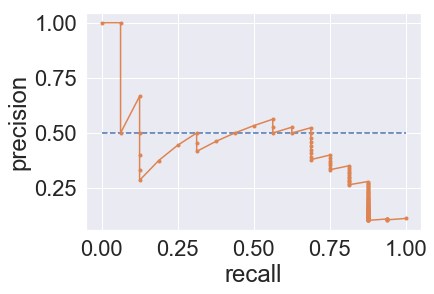

[[155   1]
 [ 14   2]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       156
           1       0.67      0.12      0.21        16

    accuracy                           0.91       172
   macro avg       0.79      0.56      0.58       172
weighted avg       0.89      0.91      0.88       172



In [64]:
# current block

model = LogisticRegression(fit_intercept = False,
                                C = 1e12,
                                class_weight='balanced',
                                solver='lbfgs',
                               max_iter = 4000)

model.fit(X_train, y_train)


# predict probabilities
probs = model.predict_proba(X_test)
# print("probs shape before drop zero: ", probs.shape)

# keep probabilities for the positive outcome only
probs = probs[:, 1]
# print("probs shape after drop zero: ", probs.shape)

# predict class values
preds = model.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, preds)

# calculate precision-recall AUC
auc_score = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_score, ap))


# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel('recall')
plt.ylabel('precision')

# show the plot
plt.show()

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

Very poor performance, this model generally performs worse at recall than randomly guessing.


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for None: 0.8878205128205128
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for Balanced: 0.844551282051282
LogisticRegression(C=1000000000000.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=4000, multi_class='warn', n_jobs=None, penalty='l2',
           

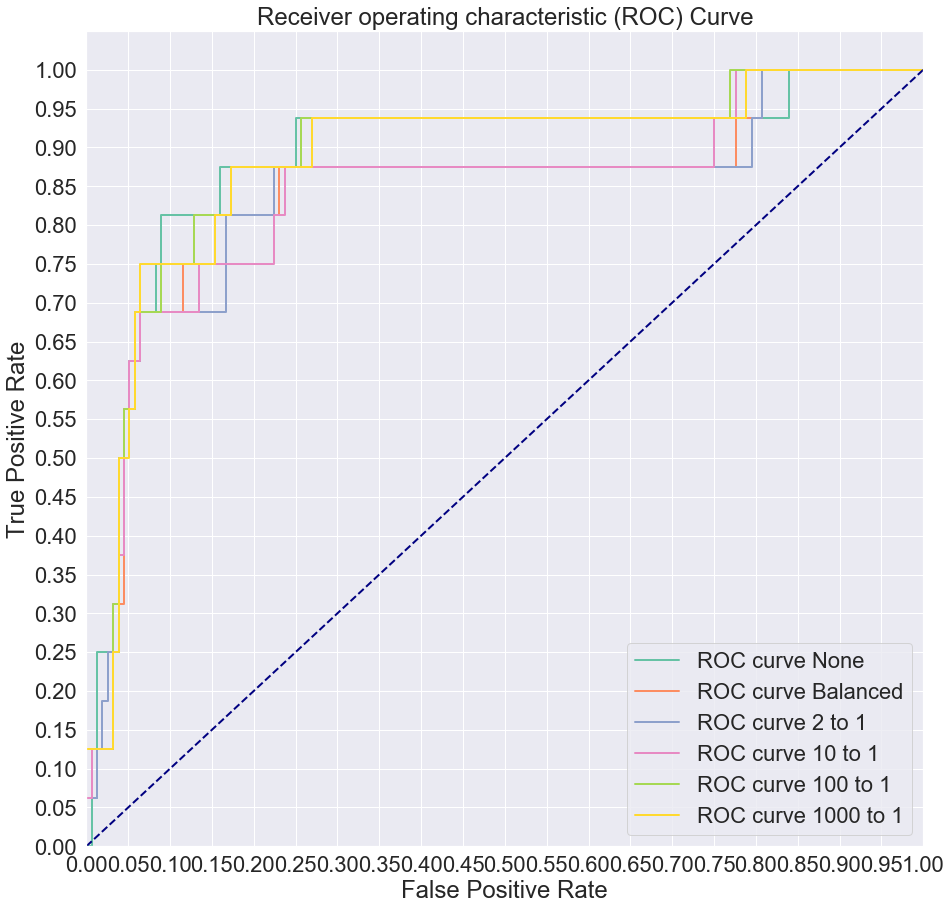

[[155   1]
 [ 14   2]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       156
           1       0.67      0.12      0.21        16

    accuracy                           0.91       172
   macro avg       0.79      0.56      0.58       172
weighted avg       0.89      0.91      0.88       172



In [65]:
# trying logistic regression with different weights
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(15,15))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False,
                                C = 1e12,
                                class_weight=weight,
                                solver='lbfgs',
                               max_iter = 4000) #Starter code
    
    model_log = logreg.fit(X_train, y_train)
    
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     precision, recall, thresholds = precision_recall_curve(y_test, y_score) # second argument is probas_pred
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# KNN
K nearest neighbors doesn't work well with extremely unbalanced data like this. I will try the model with n_neighbors= 1 first. Then I will employ a different sampling method to create a "syntheticaly" balanced dataset.

In [66]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[149   7]
 [ 10   6]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       156
           1       0.46      0.38      0.41        16

    accuracy                           0.90       172
   macro avg       0.70      0.67      0.68       172
weighted avg       0.89      0.90      0.90       172



In [67]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, preds)

Precision Score: 0.46153846153846156
Recall Score: 0.375
Accuracy Score: 0.9011627906976745
F1 Score: 0.41379310344827586


In [68]:
# find best K for f1 score
# https://en.wikipedia.org/wiki/F1_score

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=5):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        print('k: {}'.format(k))
        print('F1-Score: {}'.format(f1))
        if f1 > best_score:
            best_k = k
            best_score = f1
    print('Best Value for k: {}'.format(best_k))
    print('F1-Score: {}'.format(best_score))

In [69]:
find_best_k(X_train, y_train, X_test, y_test)

k: 1
F1-Score: 0.41379310344827586
k: 2
F1-Score: 0.0
k: 3
F1-Score: 0.19047619047619047
k: 4
F1-Score: 0.0
k: 5
F1-Score: 0.2
Best Value for k: 1
F1-Score: 0.41379310344827586


In [70]:
# find best K for recall
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=5):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)

        print('k: {}'.format(k))
        print('Recal Score: {}'.format(recall))
        if recall > best_score:
            best_k = k
            best_score = recall
    print('Best Value for k: {}'.format(best_k))
    print('Recall Score: {}'.format(best_score))

In [71]:
find_best_k(X_train, y_train, X_test, y_test)

k: 1
Recal Score: 0.375
k: 2
Recal Score: 0.0
k: 3
Recal Score: 0.125
k: 4
Recal Score: 0.0
k: 5
Recal Score: 0.125
Best Value for k: 1
Recall Score: 0.375


In [72]:
# because this is predicting cancer, it is far more preferable to not miss any positives, even if that means 
# getting more false positives. We simply do not want to miss any positives because the consequences could 
# result in death...
# So preference is given to a model that has a high recall (what percentage of actual cases of cancer did we capture in our prediction)
# This will mean more false positives (predicted as having cancer, but no cancer in reality), 
# but this is preferable to missing any cancer cases.




In [73]:
# Decision Tree 
tree_clf = DecisionTreeClassifier() 
# tree_clf.fit(X_train, y_train)

In [74]:
# lesson using gridsearch: dsc-3-32-06
dt_param_grid = {
    'class_weight': [None,'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7]}

dt_grid_search = GridSearchCV(tree_clf, 
                              param_grid = dt_param_grid, 
                              scoring = 'recall',
                              cv=3, 
                              return_train_score=True)

In [75]:
dt_grid_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                

In [76]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 95.94%
Mean Testing Score: 68.75%
Best Parameter Combination Found During Grid Search:


{'class_weight': None, 'criterion': 'gini', 'max_depth': 2}

In [77]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 2) 
tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
tree_clf.fit(X_train, y_train)

preds = pd.DataFrame(tree_clf.predict(X_test))

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

print_metrics(y_test, preds)

[[149   7]
 [  5  11]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       156
           1       0.61      0.69      0.65        16

    accuracy                           0.93       172
   macro avg       0.79      0.82      0.80       172
weighted avg       0.93      0.93      0.93       172

Precision Score: 0.6111111111111112
Recall Score: 0.6875
Accuracy Score: 0.9302325581395349
F1 Score: 0.6470588235294118


In [79]:
tree_clf.feature_importances_

array([0.0886391 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04357246, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.86778844, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

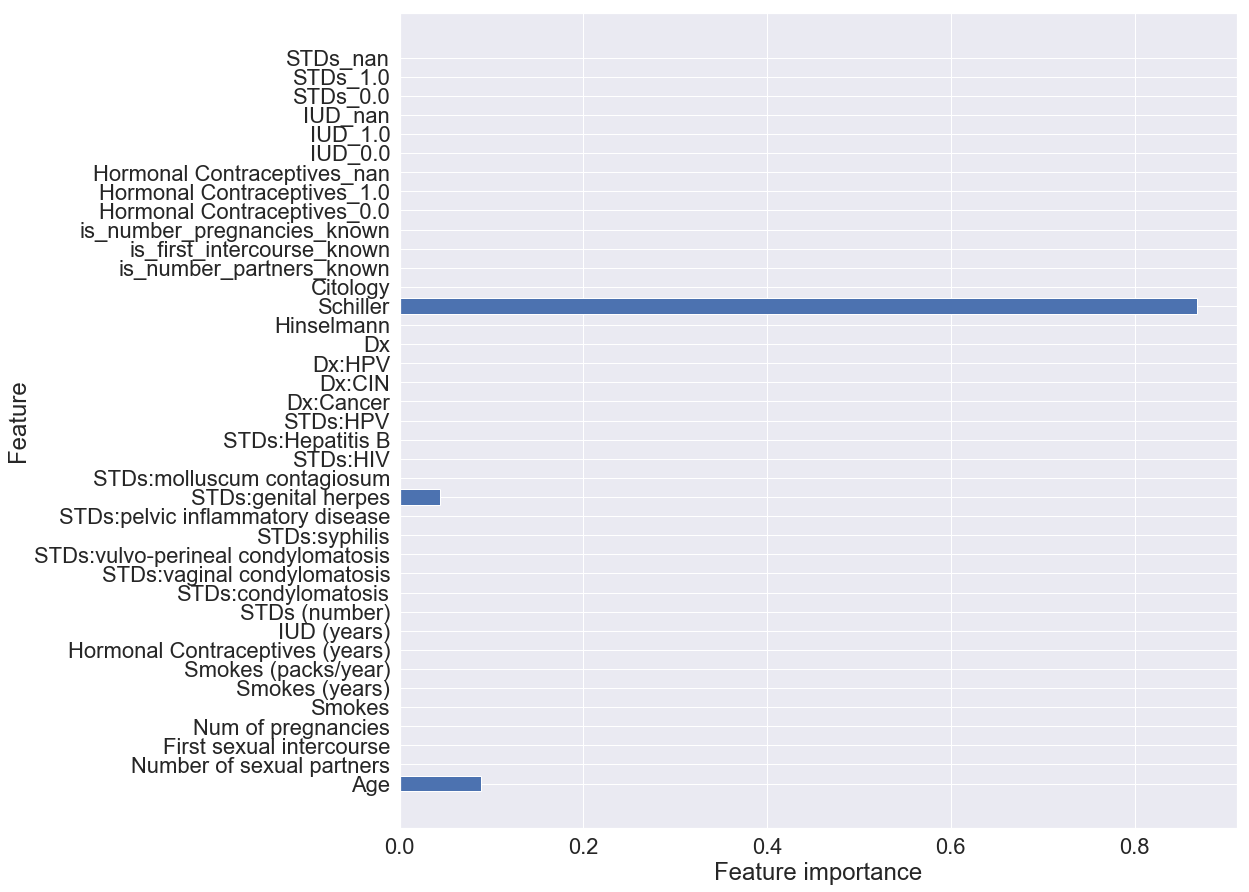

In [80]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)
plt.show()

In [81]:
y_test.value_counts(normalize=True)

0    0.906977
1    0.093023
Name: Biopsy, dtype: float64

In [82]:
preds[0].value_counts(normalize=True)


0    0.895349
1    0.104651
Name: 0, dtype: float64

In [83]:
# random forest

# forest = RandomForestClassifier(n_estimators=5, max_depth= 3, random_state=0)  #score: .9128
# forest = RandomForestClassifier(n_estimators=5, max_depth= 5, random_state=0)  #score: .8953
# forest = RandomForestClassifier(n_estimators=10, max_depth= 3, random_state=0)  #score: .9128
# forest = RandomForestClassifier(n_estimators=45, max_depth= 18, random_state=0)  #score: .9011
# forest = RandomForestClassifier(n_estimators=70, max_depth= 8, random_state=0)  #score: .9011
# forest = RandomForestClassifier(n_estimators=200, max_depth= 8, random_state=0)  #score: .9011

forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth= 5, random_state=0)

forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [84]:
preds = pd.DataFrame(forest.predict(X_test))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)

[[150   6]
 [  6  10]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       156
           1       0.62      0.62      0.62        16

    accuracy                           0.93       172
   macro avg       0.79      0.79      0.79       172
weighted avg       0.93      0.93      0.93       172

Precision Score: 0.625
Recall Score: 0.625
Accuracy Score: 0.9302325581395349
F1 Score: 0.625


In [85]:
# use grid search for the random forest classifier, use recall as the factor to optimize
forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)

forest_param_grid = {
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'n_estimators': [25, 50, 100, 200]}

forest_grid_search = GridSearchCV(forest, 
                                  param_grid = forest_param_grid, 
                                  scoring = 'recall',
                                  cv=3,
                                  return_train_score=True)

In [86]:
import time
start = time.time()

forest_grid_search.fit(X_train, y_train)

print("Testing Accuracy: {:.4}%".format(forest_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(forest_grid_search.best_params_))


Testing Accuracy: 87.18%
Total Runtime for Grid Search on Random Forest Classifier: 18.27 seconds

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 25}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [87]:
forest = RandomForestClassifier(n_estimators=25, criterion='gini', max_depth=3, class_weight='balanced', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=25, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [88]:
preds = forest.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)

[[149   7]
 [  3  13]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       156
           1       0.65      0.81      0.72        16

    accuracy                           0.94       172
   macro avg       0.82      0.88      0.84       172
weighted avg       0.95      0.94      0.94       172

Precision Score: 0.65
Recall Score: 0.8125
Accuracy Score: 0.9418604651162791
F1 Score: 0.7222222222222223


In [89]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking by importance (best to worst):")

for f in range(X_train.shape[1]):
    print('{}  -  {}'.format(importances[indices[f]], X.columns[f]))


Feature ranking by importance (best to worst):
0.38156147569503845  -  Age
0.14605027725599265  -  Number of sexual partners
0.12186330610992525  -  First sexual intercourse
0.07373451150266269  -  Num of pregnancies
0.0408880559520167  -  Smokes
0.02885778936667957  -  Smokes (years)
0.022252926354971798  -  Smokes (packs/year)
0.019743133166129846  -  Hormonal Contraceptives (years)
0.019323090150091517  -  IUD (years)
0.016983404374382446  -  STDs (number)
0.014798303196180038  -  STDs:condylomatosis
0.014687091167886608  -  STDs:vaginal condylomatosis
0.01293619053948214  -  STDs:vulvo-perineal condylomatosis
0.012632097736580448  -  STDs:syphilis
0.0101308623037267  -  STDs:pelvic inflammatory disease
0.009996498751552107  -  STDs:genital herpes
0.009681679697343263  -  STDs:molluscum contagiosum
0.008800326517694265  -  STDs:HIV
0.008705647045606777  -  STDs:Hepatitis B
0.004875190099640068  -  STDs:HPV
0.004512792499081504  -  Dx:Cancer
0.0038403519158178656  -  Dx:CIN
0.0034955

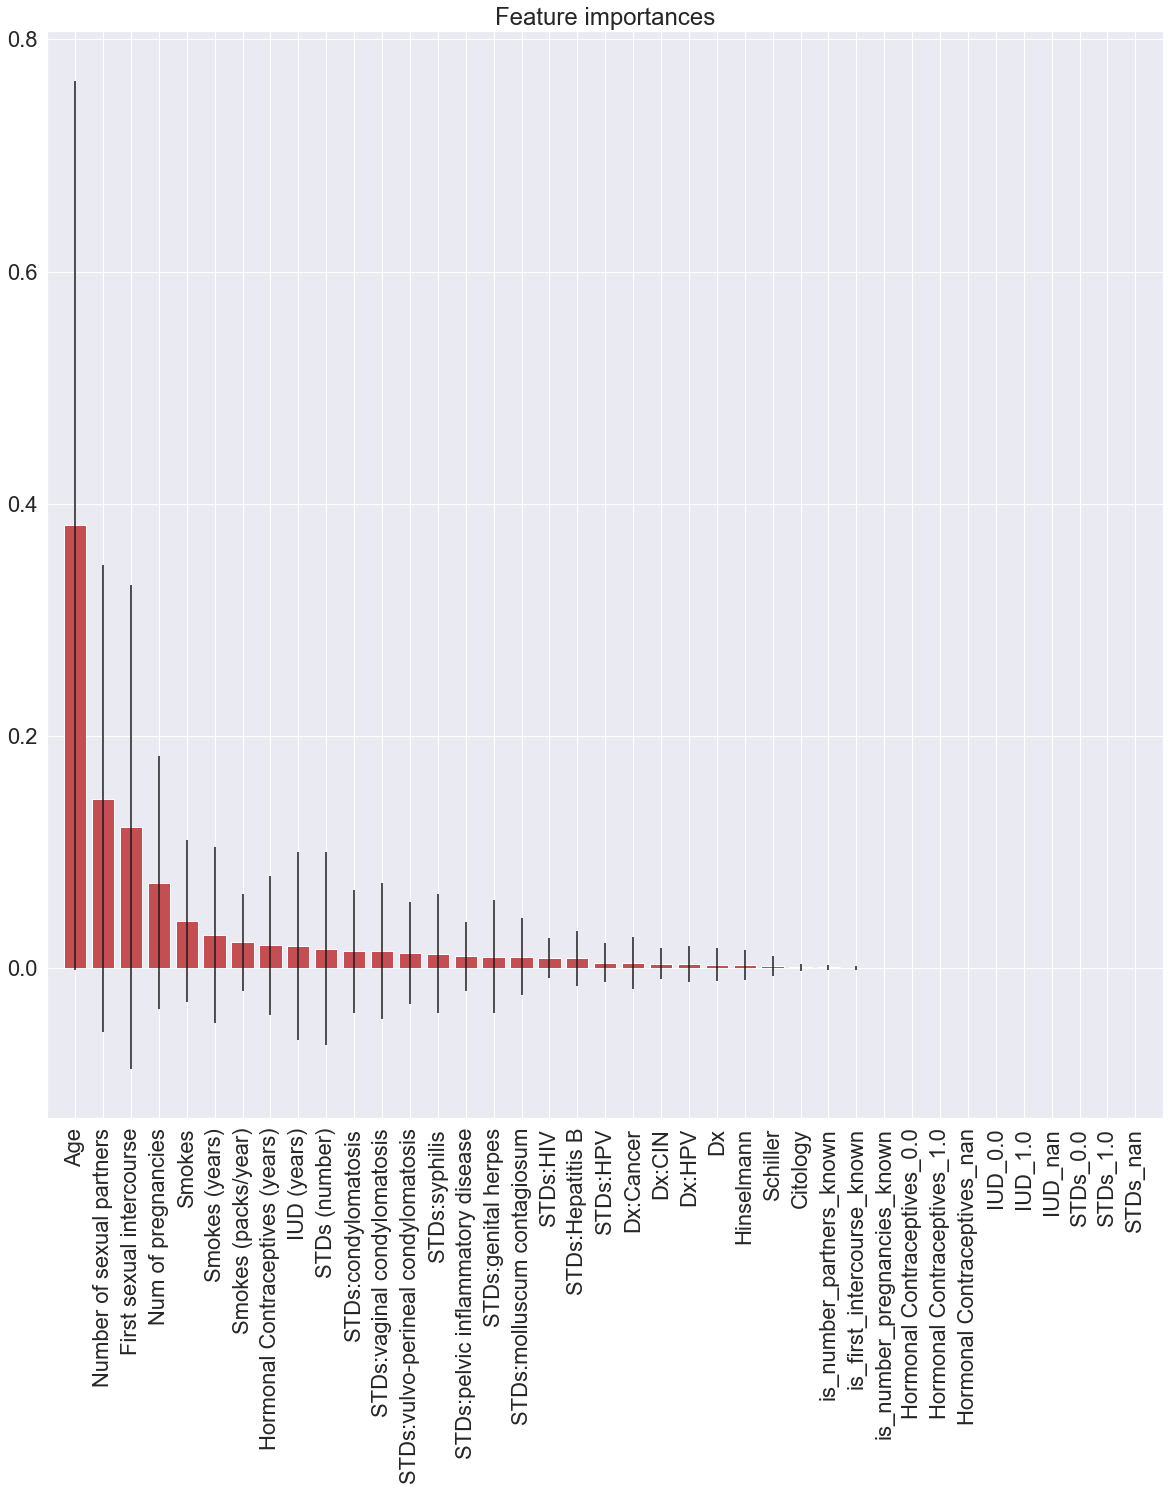

In [90]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Idea: Delete the other target variables and run the same gridsearch then see what the results for the resulting best tree.

In [91]:
from imblearn.combine import SMOTETomek

In [92]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)


# standardize the continuous factors
# minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# X_train_scaled = pd.DataFrame(minmax_scale.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(minmax_scale.fit_transform(X_test))

# X_train_scaled = X_train  #this model works better when I don't scale the non-categorical factors ???
# X_test_scaled = X_test


cc = SMOTETomek(random_state=10)

X_res, y_res = (X_train, y_train)


In [93]:
X_res = pd.DataFrame(X_res)

In [94]:
X_res.shape

(686, 39)

In [95]:
y_res.value_counts()

0    647
1     39
Name: Biopsy, dtype: int64

Now that I have resampled using SMOTE, use grid search to find the best parameters for a random forest.

In [98]:
# use grid search for the random forest classifier, use recall as the factor to optimize
forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, n_jobs=-1)

forest_param_grid = {
    'class_weight': [None, 'balanced', {0:1, 1:10}],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'n_estimators': [10, 15, 20, 25]}

forest_grid_search = GridSearchCV(forest, 
                                  param_grid = forest_param_grid, 
                                  scoring = 'recall',
                                  cv=3,
                                  return_train_score=True)

In [99]:
import time
start = time.time()

forest_grid_search.fit(X_res, y_res)

print("Testing Accuracy: {:.4}%".format(forest_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(forest_grid_search.best_params_))

Testing Accuracy: 87.18%
Total Runtime for Grid Search on Random Forest Classifier: 85.12 seconds

Optimal Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [123]:
forest = RandomForestClassifier(n_estimators=10, 
                                criterion='gini',
                                class_weight='balanced', 
                                max_depth=2,
                                random_state=0, 
                                n_jobs=-1)

forest.fit(X_res, y_res)

preds = forest.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)

[[148   8]
 [  2  14]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       156
           1       0.64      0.88      0.74        16

    accuracy                           0.94       172
   macro avg       0.81      0.91      0.85       172
weighted avg       0.95      0.94      0.95       172

Precision Score: 0.6363636363636364
Recall Score: 0.875
Accuracy Score: 0.9418604651162791
F1 Score: 0.7368421052631579


In [102]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking by importance (best to worst):")

for f in range(X_train.shape[1]):
    print('{}  -  {}'.format(importances[indices[f]], X.columns[f]))


Feature ranking by importance (best to worst):
0.6142448058259562  -  Age
0.17926556688555317  -  Number of sexual partners
0.06562749100471366  -  First sexual intercourse
0.04666141160074528  -  Num of pregnancies
0.022954870430351028  -  Smokes
0.01601978364572571  -  Smokes (years)
0.014222165085402718  -  Smokes (packs/year)
0.01285739340999365  -  Hormonal Contraceptives (years)
0.01076912661064802  -  IUD (years)
0.008568238210632064  -  STDs (number)
0.004631844260676249  -  STDs:condylomatosis
0.002738427900322609  -  STDs:vaginal condylomatosis
0.0014388751292796823  -  STDs:vulvo-perineal condylomatosis
0.0  -  STDs:syphilis
0.0  -  STDs:pelvic inflammatory disease
0.0  -  STDs:genital herpes
0.0  -  STDs:molluscum contagiosum
0.0  -  STDs:HIV
0.0  -  STDs:Hepatitis B
0.0  -  STDs:HPV
0.0  -  Dx:Cancer
0.0  -  Dx:CIN
0.0  -  Dx:HPV
0.0  -  Dx
0.0  -  Hinselmann
0.0  -  Schiller
0.0  -  Citology
0.0  -  is_number_partners_known
0.0  -  is_first_intercourse_known
0.0  -  is_nu

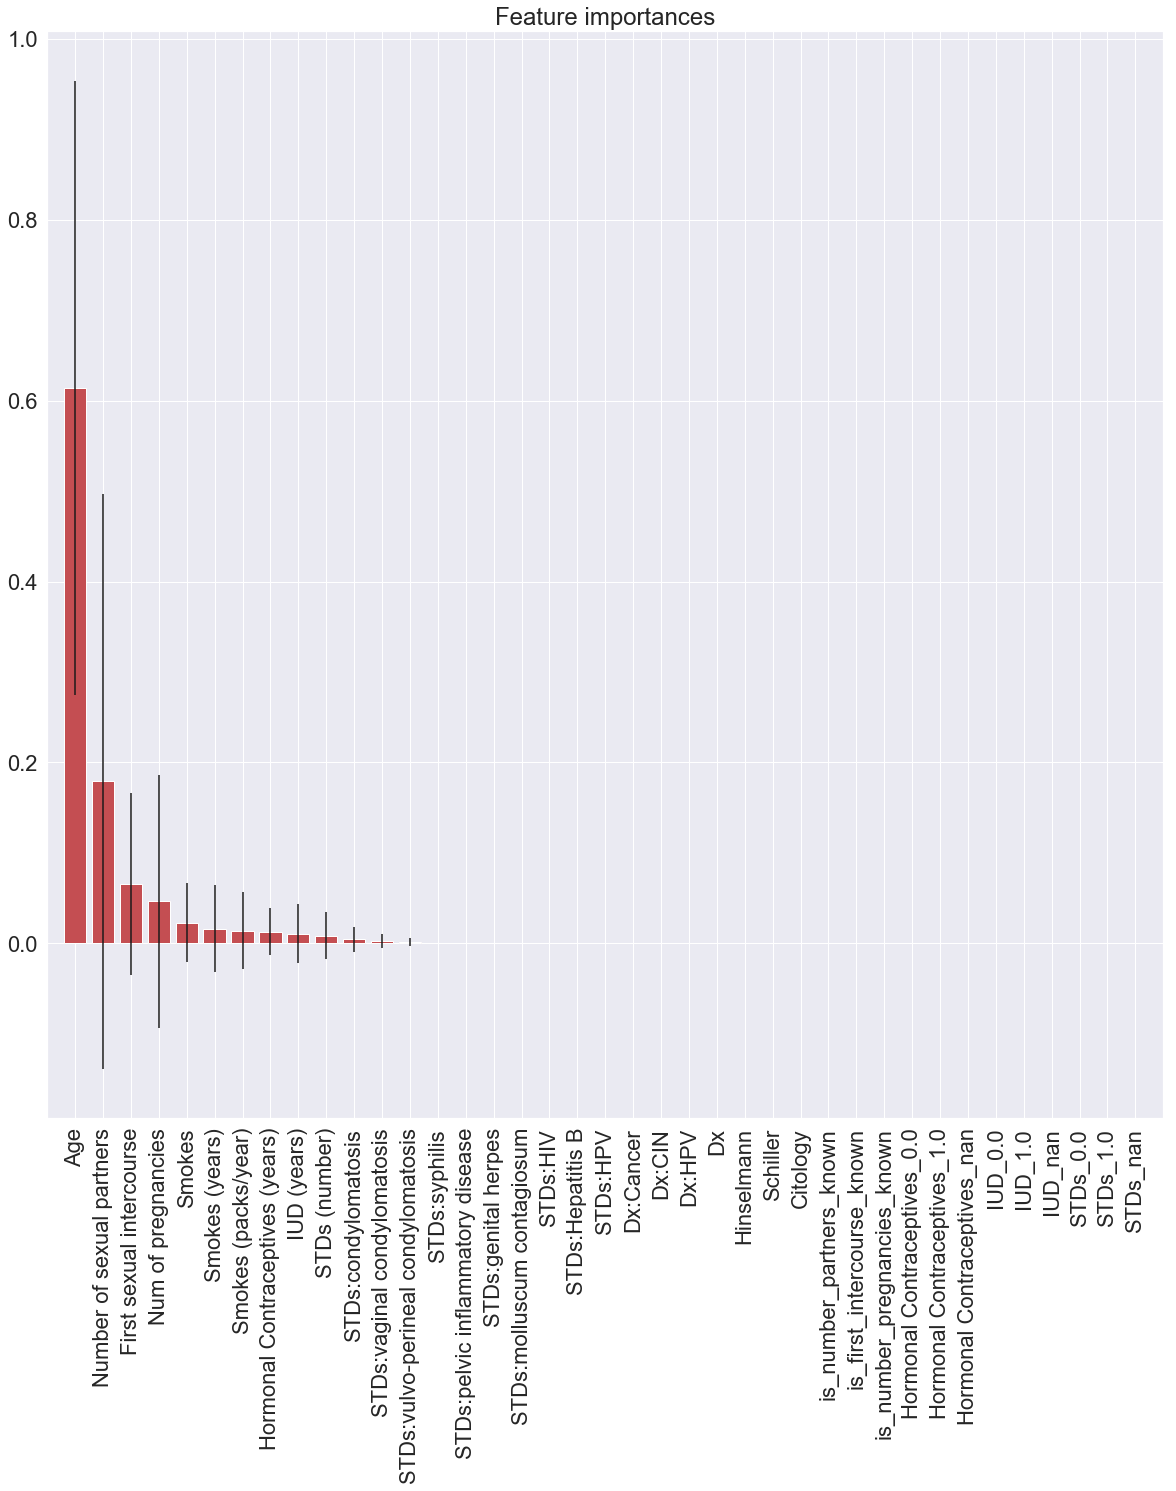

In [103]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# SVM

In [105]:
# base SVM
clf = svm.SVC(cache_size=1000, gamma='scale')
clf

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
clf.fit(X_train, y_train)  
preds = clf.predict(X_test)

In [107]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[150   6]
 [ 10   6]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       156
           1       0.50      0.38      0.43        16

    accuracy                           0.91       172
   macro avg       0.72      0.67      0.69       172
weighted avg       0.90      0.91      0.90       172



In [108]:
#set class_weight to balanced
clf = svm.SVC(cache_size=1000, gamma='scale', class_weight='balanced')
clf

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
clf.fit(X_train, y_train)  
preds = clf.predict(X_test)

In [110]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[147   9]
 [  3  13]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       156
           1       0.59      0.81      0.68        16

    accuracy                           0.93       172
   macro avg       0.79      0.88      0.82       172
weighted avg       0.94      0.93      0.94       172



In [111]:
#try with resampled data
clf = svm.SVC(cache_size=1000, gamma='scale', class_weight='balanced')
clf

SVC(C=1.0, cache_size=1000, class_weight={0: 1, 1: 10}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
clf.fit(X_res, y_res)  
preds = clf.predict(X_test)

In [126]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[147   9]
 [  3  13]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       156
           1       0.59      0.81      0.68        16

    accuracy                           0.93       172
   macro avg       0.79      0.88      0.82       172
weighted avg       0.94      0.93      0.94       172



In [114]:
# run a new SVM after dropping the other target columns
X_train.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,is_number_pregnancies_known,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,STDs_1.0,STDs_nan
0,0.183099,0.074074,0.409091,0.181818,0.0,0.0,0.0,0.166667,0.0,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.267606,0.000000,0.545455,0.181818,0.0,0.0,0.0,0.233333,0.0,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.056338,0.037037,0.227273,0.181818,0.0,0.0,0.0,0.000000,0.0,0.75,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.098592,0.074074,0.272727,0.363636,0.0,0.0,0.0,0.100000,0.0,0.00,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.197183,0.185185,0.318182,0.181818,0.0,0.0,0.0,0.000000,0.0,0.00,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 39 columns):
Age                                   686 non-null float64
Number of sexual partners             686 non-null float64
First sexual intercourse              686 non-null float64
Num of pregnancies                    686 non-null float64
Smokes                                686 non-null float64
Smokes (years)                        686 non-null float64
Smokes (packs/year)                   686 non-null float64
Hormonal Contraceptives (years)       686 non-null float64
IUD (years)                           686 non-null float64
STDs (number)                         686 non-null float64
STDs:condylomatosis                   686 non-null float64
STDs:vaginal condylomatosis           686 non-null float64
STDs:vulvo-perineal condylomatosis    686 non-null float64
STDs:syphilis                         686 non-null float64
STDs:pelvic inflammatory disease      686 non-null float64
STDs:genit

In [116]:
X_train_2 = X_train.drop(['Hinselmann', 'Schiller', 'Citology'], axis=1 )
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 36 columns):
Age                                   686 non-null float64
Number of sexual partners             686 non-null float64
First sexual intercourse              686 non-null float64
Num of pregnancies                    686 non-null float64
Smokes                                686 non-null float64
Smokes (years)                        686 non-null float64
Smokes (packs/year)                   686 non-null float64
Hormonal Contraceptives (years)       686 non-null float64
IUD (years)                           686 non-null float64
STDs (number)                         686 non-null float64
STDs:condylomatosis                   686 non-null float64
STDs:vaginal condylomatosis           686 non-null float64
STDs:vulvo-perineal condylomatosis    686 non-null float64
STDs:syphilis                         686 non-null float64
STDs:pelvic inflammatory disease      686 non-null float64
STDs:genit

In [117]:
X_test_2 = X_test.drop(['Hinselmann', 'Schiller', 'Citology'], axis=1 )
X_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 36 columns):
Age                                   172 non-null float64
Number of sexual partners             172 non-null float64
First sexual intercourse              172 non-null float64
Num of pregnancies                    172 non-null float64
Smokes                                172 non-null float64
Smokes (years)                        172 non-null float64
Smokes (packs/year)                   172 non-null float64
Hormonal Contraceptives (years)       172 non-null float64
IUD (years)                           172 non-null float64
STDs (number)                         172 non-null float64
STDs:condylomatosis                   172 non-null float64
STDs:vaginal condylomatosis           172 non-null float64
STDs:vulvo-perineal condylomatosis    172 non-null float64
STDs:syphilis                         172 non-null float64
STDs:pelvic inflammatory disease      172 non-null float64
STDs:genit

In [118]:
clf = svm.SVC(cache_size=1000, gamma='scale', class_weight='balanced')
clf

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
clf.fit(X_train_2, y_train)  
preds = clf.predict(X_test_2)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[143  13]
 [ 12   4]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       156
           1       0.24      0.25      0.24        16

    accuracy                           0.85       172
   macro avg       0.58      0.58      0.58       172
weighted avg       0.86      0.85      0.86       172



Precision stays high but recall drops off a cliff when I remove the other target variables...despite those variables being listed as very low importance...why?


Try a random forest on the new factors list (no other targets.)

In [128]:
forest = RandomForestClassifier(n_estimators=10, 
                                criterion='gini',
                                class_weight='balanced', 
                                max_depth=2,
                                random_state=0, 
                                n_jobs=-1)

forest.fit(X_train_2, y_train)

preds = forest.predict(X_test_2)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)


[[139  17]
 [ 10   6]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       156
           1       0.26      0.38      0.31        16

    accuracy                           0.84       172
   macro avg       0.60      0.63      0.61       172
weighted avg       0.87      0.84      0.86       172

Precision Score: 0.2608695652173913
Recall Score: 0.375
Accuracy Score: 0.8430232558139535
F1 Score: 0.30769230769230765


Try SMOTE resampling on the new factors list (other target variables removed) 

In [129]:
# X_res = resampled X_test
# y_res = resampled y_test


X_train_res_2 = X_res.drop(['Hinselmann', 'Schiller', 'Citology'], axis=1 )
X_test_2 = X_test.drop(['Hinselmann', 'Schiller', 'Citology'], axis=1 )


In [131]:
forest.fit(X_train_res_2, y_res)

preds = forest.predict(X_test_2)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print_metrics(y_test, preds)



[[139  17]
 [ 10   6]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       156
           1       0.26      0.38      0.31        16

    accuracy                           0.84       172
   macro avg       0.60      0.63      0.61       172
weighted avg       0.87      0.84      0.86       172

Precision Score: 0.2608695652173913
Recall Score: 0.375
Accuracy Score: 0.8430232558139535
F1 Score: 0.30769230769230765


# STOP HERE

In [135]:
# from https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn

from IPython.display import SVG
graph = Source( forest.export_graphviz(dtreg, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

NameError: name 'Source' is not defined

In [132]:
# from https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn

from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))

ModuleNotFoundError: No module named 'graphviz'

In [128]:
!pip list

Package              Version  
-------------------- ---------
absl-py              0.7.1    
appnope              0.1.0    
asn1crypto           0.24.0   
astor                0.8.0    
atomicwrites         1.3.0    
attrs                19.1.0   
backcall             0.1.0    
beautifulsoup4       4.7.1    
bleach               3.1.0    
bokeh                1.2.0    
boto                 2.49.0   
boto3                1.9.134  
botocore             1.12.153 
branca               0.3.1    
bz2file              0.98     
certifi              2019.6.16
cffi                 1.11.5   
chardet              3.0.4    
convertdate          2.1.3    
cryptography         2.3.1    
cryptography-vectors 2.3.1    
cycler               0.10.0   
Cython               0.28.5   
decorator            4.3.0    
defusedxml           0.6.0    
docutils             0.14     
entrypoints          0.3      
ephem                3.7.6.0  
fbprophet            0.5      
folium               0.9.1    
gast    

In [121]:
# from dsc-3-31-07
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())